# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Investigate whether there is a relationship between the number of licenses and traffic accidents, and check whether accidents increase or decrease in general in the Kingdom of Saudi Arabia.

## Executive Summary
Makkah Al-Mukarramah contains the highest rate of accidents, deaths and injuries in the Kingdom of Saudi Arabia, while the northern region of the Kingdom contains the lowest number of accidents, but the positive side is that these accidents decrease every year from the previous year, unfortunately I do not have years older than 2016 to measure if the positive progress The number of accidents decreased after the implementation of the Saher system.


### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')



## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
traffic=pd.read_csv('saudi-arabia-traffic-accidents-2008.csv',sep=';')
driving=pd.read_csv('saudi-arabia-driving-licenses-2004-2008.csv',sep=';')


#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
traffic.head(10)


,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [4]:
driving.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:
- There are unnamed columns with unknown numbers also the year represent the year and region means the place and the year they collected the data in, state represent the casualties or Accidents/Dead or Injured and finally, geo_point_2d is the coordinates which used to determine any place on the earth using latitude(x) and longitude(y).


- Through random testing of some coordinates, I noticed that some of them point to an entire region, but it is strange that some of them refer only to a specific place.


- For example, a site with coordinates :(20.1484058,41.466547777777784) is the National Commercial Bank in Jeddah. Perhaps this reason is due to an error in data collection or it is the most dangerous place in terms of accidents.

#### 4a. How complete is the data?

Investigate missing values etc.

In [5]:
#Return only those rows which have missing values
null_data = traffic[traffic.isnull().any(axis=1)]
null_data

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
29,29,29,(2016),Total,No. of Accidents,533380n,NaN
30,30,30,(2016),Total,No. of Casualties - Injured,38120n,NaN
68,68,68,(2017),Total,No. of Accidents,460488n,NaN
69,69,69,(2017),Total,No. of Casualties - Injured,33199n,NaN
77,77,77,(2016),Total,No. of Casualties - Dead,9031n,NaN


In [6]:
#Return only those rows which have missing values
null_data = driving[driving.isnull().any(axis=1)]
null_data

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
58,58,(2015),Total,435439n,NaN
59,59,(2017),Total,928165n,NaN
60,60,(1993),Total,294893n,NaN
61,61,(1994),Total,303520n,NaN
62,62,(2003),Total,254858n,NaN
63,63,(2006),Total,267508n,NaN
142,142,(2014),Total,625414n,NaN
143,143,(2010),Total,386510n,NaN
144,144,(2012),Total,411204n,NaN
145,145,(1999),Total,332210n,NaN


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [7]:
print('The maximum value for every columns in Traffic_Accidents:\n',traffic.max(),'\n\n')
print('The minimum value for every columns in Traffic_Accidents:\n ',traffic.min(),'\n\n')
print('The maximum value for every columns in Driving_Licenses:\n ',driving.max(),'\n\n')
print('The minimum value for every columns in Driving_Licenses:\n ',driving.min(),'\n\n')

The maximum value for every columns in Traffic_Accidents:
 Unnamed: 0                               83
Unnamed: 0.1                             83
Year                                 (2017)
Region                                Total
Indicator       No. of Casualties - Injured
Value                                99925n
dtype: object 


The minimum value for every columns in Traffic_Accidents:
  Unnamed: 0                     0
Unnamed: 0.1                   0
Year                      (2016)
Region                  Al-Baaha
Indicator       No. of Accidents
Value                      1007n
dtype: object 


The maximum value for every columns in Driving_Licenses:
  Unnamed: 0                349
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object 


The minimum value for every columns in Driving_Licenses:
  Unnamed: 0                   0
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype:

- Some problems arose, including that he or "it" found the maximum value for the regions, but in reality, there are no maximum values for the texts, and the same applies if there are wounded or injured or not.
On the other hand, the number of those affected and the number of license holders are not correct, because this data is treated as text
It has not yet been converted to a number in order to found the maximum and minimum value.

#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
print('Traffic_Accidents type: \n',traffic.dtypes,'\n\n')
print('Driving_Licenses type: \n',driving.dtypes,'\n\n')

Traffic_Accidents type: 
 Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object 


Driving_Licenses type: 
 Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object 




What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?




Answer:

- Yes, both the years and the values of the affected people and the license holders must be converted into numbers 'int'. As for the coordinates, they must be converted into a float. As for the areas and the status of the affected person, it must be ensured that they are clean and then converted into text although this version does not show the type of text as 'str', but everything will be fine after cleaning.

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [9]:
#to convert year from object to int we need to remove  special character before converting

traffic['Year'] = traffic['Year'].apply(lambda x: x.replace('(','').replace(')',''))
#now we can convert year from object to int
traffic['Year'] = traffic['Year'].apply(pd.to_numeric)


traffic['y'], traffic['y'] = traffic['geo_point_2d'].str.split(',', 1).str
traffic['x'], traffic['y'] = traffic['geo_point_2d'].str.split(',', 1).str
traffic['x'] = traffic['x'].apply(pd.to_numeric)
traffic['y'] = traffic['y'].apply(pd.to_numeric)

traffic['Region'] = traffic['Region'].apply(lambda x: x.replace('-','_').replace(' ','_'))
traffic['Region'] = traffic['Region'].astype(str)

traffic['Indicator'] = traffic['Indicator'].apply(lambda x: x.replace('-',' and  ').replace('No. ',''))
traffic['Indicator'] = traffic['Indicator'].astype(str)

traffic['Value'] = traffic['Value'].apply(lambda x: x.replace('n',''))
traffic['Value'] = traffic['Value'].apply(pd.to_numeric)

#===========================================================#
#I will do the same thing but to the other dataframe
driving['y'], driving['y'] = driving['geo_point_2d'].str.split(',', 1).str
driving['x'], driving['y'] = driving['geo_point_2d'].str.split(',', 1).str


driving['Year'] = driving['Year'].apply(lambda x: x.replace('(','').replace(')',''))
#now we can convert year from object to int
driving['Year'] = driving['Year'].apply(pd.to_numeric)

driving['x'] = driving['x'].apply(pd.to_numeric)
driving['y'] = driving['y'].apply(pd.to_numeric)

driving['Administritive Area'] = driving['Administritive Area'].apply(lambda x: x.replace('-','_').replace(' ','_'))


driving['Driving Liceses'] = driving['Driving Liceses'].apply(lambda x: x.replace('n',''))
driving['Driving Liceses'] = driving['Driving Liceses'].apply(pd.to_numeric)


driving['Administritive Area'] = driving['Administritive Area'].astype(str)


<ipython-input-9-bc2aebce7a32>:8: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  traffic['y'], traffic['y'] = traffic['geo_point_2d'].str.split(',', 1).str
<ipython-input-9-bc2aebce7a32>:9: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  traffic['x'], traffic['y'] = traffic['geo_point_2d'].str.split(',', 1).str
<ipython-input-9-bc2aebce7a32>:24: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  driving['y'], driving['y'] = driving['geo_point_2d'].str.split(',', 1).str
<ipython-input-9-bc2aebce7a32>:25: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  driving['x'], driving['y'] = driving['geo_point_2d'].str.split(',', 1).str


- Make new columns `x` and `y` using `geo_point_2d`

In [10]:
#I integrated them all into the top code

- Fix any individual values preventing other columns from being the appropriate type.

In [11]:
#I integrated them all into the top code

- Finish your data modifications by making sure the columns are now typed appropriately.

In [12]:
#I integrated them all into the top code

- Display the data types again to confirm they are correct.

In [13]:
print('Traffic_Accidents type: \n',traffic.dtypes,'\n\n')
print('Driving_Licenses type: \n',driving.dtypes,'\n\n')

Traffic_Accidents type: 
 Unnamed: 0        int64
Unnamed: 0.1      int64
Year              int64
Region           object
Indicator        object
Value             int64
geo_point_2d     object
y               float64
x               float64
dtype: object 


Driving_Licenses type: 
 Unnamed: 0               int64
Year                     int64
Administritive Area     object
Driving Liceses          int64
geo_point_2d            object
y                      float64
x                      float64
dtype: object 




#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [14]:
traffic.columns =['traffic_unnamed_col1','traffic_unnamed_col2','year','region',
                   'state','traffic_accidents','traffic_coordinates','traffic_x_coordinate','traffic_y_coordinate']

traffic.head(1)

,traffic_unnamed_col1,traffic_unnamed_col2,year,region,state,traffic_accidents,traffic_coordinates,traffic_x_coordinate,traffic_y_coordinate
0,0,0,2016,Makkah,of Casualties and Injured,12383,"21.628962766, 41.2636898334",41.26369,21.628963


In [15]:
driving.columns =['driving_unnamed_col','year','region',
                   'driving_licenses','driving_coordinates','driving_x_coordinates','driving_y_coordinate']
driving.head(1)

,driving_unnamed_col,year,region,driving_licenses,driving_coordinates,driving_x_coordinates,driving_y_coordinate
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334",41.26369,21.628963


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|unnamed_col1|int64|Traffic_Accidents|Unknown number| 
|unnamed_col2|int64|Traffic_Accidents|Unknown number| 
|year|int64|Traffic_Accidents|The year they collected the data in| 
|region|str64|Traffic_Accidents|The city from which the data are collected| 
|state|str64|Traffic_Accidents|Casualties or Accidents/Dead or Injured|
|coordinates|float64|Traffic_Accidents|Used to determine any place on the earth using latitude(x) and longitude(y)| 
|x_coordinate|float64|Traffic_Accidents|latitude(x)| 
|y_coordinate|float64|Traffic_Accidents|and longitude(y)| 




|Feature|Type|Dataset|Description|
|---|---|---|---|
|unnamed_col1|int64|Driving_Licenses|Unknown number| 
|year|int64|Driving_Licenses|The year they collected the data in| 
|administritive_area|str64|Driving_Licenses|The city from which the data are collected| 
|driving_licenses_number|str64|Driving_Licenses|Number of license holders|
|coordinates|float64|Driving_Licenses|Used to determine any place on the earth using latitude(x) and longitude(y)| 
|x_coordinate|float64|Driving_Licenses|latitude(x)| 
|y_coordinate|float64|Driving_Licenses|and longitude(y)| 

 





#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [16]:
traffic.region.unique()

array(['Makkah', 'Eastern_Region', 'Tabouk', 'Hail', 'Northern_Boarder',
       'Jazan', 'Al_Jouf', 'Total', 'Al_Baaha', 'Riyadh', 'Madinah',
       'Qassim', 'Najran', 'Asir'], dtype=object)

In [17]:
traffic.loc[traffic['region'] == 'Total', 'traffic_accidents'].sum()


1081707

In [18]:
new_traffic=traffic.copy()
new_traffic = new_traffic.drop(new_traffic[new_traffic['region']=='Total'].index)
new_traffic.region.unique()


array(['Makkah', 'Eastern_Region', 'Tabouk', 'Hail', 'Northern_Boarder',
       'Jazan', 'Al_Jouf', 'Al_Baaha', 'Riyadh', 'Madinah', 'Qassim',
       'Najran', 'Asir'], dtype=object)

In [19]:
new_traffic[['traffic_accidents']].sum()


traffic_accidents    1081707
dtype: int64

#### the traffic accidents of region(total) = 1081707 and then I drop that col and sum the traffic accidents again and I ensure that both of them are equals.

In [20]:
driving.region.unique()

array(['Makkah', 'Madinah', 'Al_Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern_Boarder', 'Jazan', 'Najran', 'Al_Baha',
       'Al_Jouf', 'Total', 'Riyadh'], dtype=object)

In [21]:
driving.loc[driving['region'] == 'Total', 'driving_licenses'].sum()


9397488

In [22]:
new_driving=driving.copy()
new_driving = new_driving.drop(new_driving[new_driving['region']=='Total'].index)
new_driving.region.unique()

array(['Makkah', 'Madinah', 'Al_Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern_Boarder', 'Jazan', 'Najran', 'Al_Baha',
       'Al_Jouf', 'Riyadh'], dtype=object)

In [23]:
new_driving[['driving_licenses']].sum()


driving_licenses    9397488
dtype: int64

#### the driving licenses  of region(total) = 9397488 and then I drop that col and sum the traffic accidents again and I ensure that both of them are equals.

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [24]:
new_traffic_lomng = pd.melt(new_traffic,id_vars="traffic_unnamed_col1")
new_traffic_lomng

,traffic_unnamed_col1,variable,value
0,0,traffic_unnamed_col2,0
1,1,traffic_unnamed_col2,1
2,2,traffic_unnamed_col2,2
3,3,traffic_unnamed_col2,3
4,4,traffic_unnamed_col2,4
...,...,...,...
619,79,traffic_y_coordinate,19.1388
620,80,traffic_y_coordinate,27.4008
621,81,traffic_y_coordinate,20.1484
622,82,traffic_y_coordinate,20.1484


In [25]:
new_traffic_lomng.shape

(624, 3)

In [26]:
new_traffic.shape

(78, 9)

In [27]:
new_driving_lomng =pd.melt(new_driving,id_vars="driving_unnamed_col")
new_driving_lomng

,driving_unnamed_col,variable,value
0,0,year,2012
1,1,year,1994
2,2,year,1998
3,3,year,2004
4,4,year,2005
...,...,...,...
1945,345,driving_y_coordinate,27.9017
1946,346,driving_y_coordinate,27.9017
1947,347,driving_y_coordinate,27.4008
1948,348,driving_y_coordinate,27.4008


In [28]:
new_driving_lomng.shape

(1950, 3)

In [29]:
new_driving.shape

(325, 7)

To answer question 10 I know my data frame is wide but to prove it I converd it to long frame then comaper between the shape of the dataframes.


- For new_traffic the wide shape is (78, 9) and it's change to (624, 3) after being long frame,


- For new_driving the wide shape is (325, 7) and it's change to (1950, 3) after being long frame 


#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

I will definitely use the wide format because it is easier to handle and clear and I can see all my features clearly.

In [30]:
new_traffic_lomng.columns.traffic_unnamed_col1=None
new_traffic_lomng

,traffic_unnamed_col1,variable,value
0,0,traffic_unnamed_col2,0
1,1,traffic_unnamed_col2,1
2,2,traffic_unnamed_col2,2
3,3,traffic_unnamed_col2,3
4,4,traffic_unnamed_col2,4
...,...,...,...
619,79,traffic_y_coordinate,19.1388
620,80,traffic_y_coordinate,27.4008
621,81,traffic_y_coordinate,20.1484
622,82,traffic_y_coordinate,20.1484


In [31]:
back_to_wide=new_traffic_lomng.pivot(index="traffic_unnamed_col1" , columns="variable" 
                                  , values="value").reset_index()
back_to_wide

variable,traffic_unnamed_col1,region,state,traffic_accidents,traffic_coordinates,traffic_unnamed_col2,traffic_x_coordinate,traffic_y_coordinate,year
0,0,Makkah,of Casualties and Injured,12383,"21.628962766, 41.2636898334",0,41.2637,21.629,2016
1,1,Eastern_Region,of Casualties and Dead,1113,"23.2883307307, 50.1478302439",1,50.1478,23.2883,2016
2,2,Tabouk,of Casualties and Dead,434,"27.90165499, 37.2598581394",2,37.2599,27.9017,2016
3,3,Hail,of Casualties and Dead,299,"27.400845724, 41.4406960508",3,41.4407,27.4008,2016
4,4,Hail,of Accidents,10199,"27.400845724, 41.4406960508",4,41.4407,27.4008,2016
...,...,...,...,...,...,...,...,...,...
73,79,Asir,of Casualties and Injured,2368,"19.1387847401, 42.941470036",79,42.9415,19.1388,2017
74,80,Hail,of Casualties and Injured,773,"27.400845724, 41.4406960508",80,41.4407,27.4008,2017
75,81,Al_Baaha,of Casualties and Dead,134,"20.1484058503, 41.4665484892",81,41.4665,20.1484,2017
76,82,Al_Baaha,of Accidents,1414,"20.1484058503, 41.4665484892",82,41.4665,20.1484,2017


In [32]:

new_driving_lomng.columns.driving_unnamed_col=None


In [33]:
back_to_wide=new_driving_lomng.pivot(index="driving_unnamed_col" , columns="variable" 
                                  , values="value").reset_index()
back_to_wide



variable,driving_unnamed_col,driving_coordinates,driving_licenses,driving_x_coordinates,driving_y_coordinate,region,year
0,0,"21.628962766, 41.2636898334",143954,41.2637,21.629,Makkah,2012
1,1,"21.628962766, 41.2636898334",75349,41.2637,21.629,Makkah,1994
2,2,"21.628962766, 41.2636898334",86082,41.2637,21.629,Makkah,1998
3,3,"21.628962766, 41.2636898334",86636,41.2637,21.629,Makkah,2004
4,4,"21.628962766, 41.2636898334",65099,41.2637,21.629,Makkah,2005
...,...,...,...,...,...,...,...
320,345,"27.90165499, 37.2598581394",8473,37.2599,27.9017,Tabouk,2000
321,346,"27.90165499, 37.2598581394",8259,37.2599,27.9017,Tabouk,2006
322,347,"27.400845724, 41.4406960508",9731,41.4407,27.4008,Hail,2013
323,348,"27.400845724, 41.4406960508",6606,41.4407,27.4008,Hail,1997


#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

- Before I merge them I will sure that all the shared regions have the same name

In [34]:
print(new_driving.region.unique())
print(new_traffic.region.unique())

['Makkah' 'Madinah' 'Al_Qaseem' 'Eastern' 'Assir' 'Tabouk' 'Hail'
 'Northern_Boarder' 'Jazan' 'Najran' 'Al_Baha' 'Al_Jouf' 'Riyadh']
['Makkah' 'Eastern_Region' 'Tabouk' 'Hail' 'Northern_Boarder' 'Jazan'
 'Al_Jouf' 'Al_Baaha' 'Riyadh' 'Madinah' 'Qassim' 'Najran' 'Asir']


In [35]:
new_driving['region'] = new_driving['region'].apply(lambda x: x.replace('Eastern','Eastern_Region').replace('Al_Baha','Al_Baaha')
                                             .replace('Al_Qaseem','Qassim').replace('Assir','Asir'))
print(new_driving.region.unique())
print(new_traffic.region.unique())

['Makkah' 'Madinah' 'Qassim' 'Eastern_Region' 'Asir' 'Tabouk' 'Hail'
 'Northern_Boarder' 'Jazan' 'Najran' 'Al_Baaha' 'Al_Jouf' 'Riyadh']
['Makkah' 'Eastern_Region' 'Tabouk' 'Hail' 'Northern_Boarder' 'Jazan'
 'Al_Jouf' 'Al_Baaha' 'Riyadh' 'Madinah' 'Qassim' 'Najran' 'Asir']


In [36]:
combined_datasets=pd.merge(new_traffic, new_driving, on=['region','year'])


In [37]:
combined_datasets.isna().sum().sum()

0

In [38]:
combined_datasets.year.unique()

array([2016, 2017], dtype=int64)

In [39]:
outer_combined_datasets=pd.merge(new_traffic,new_driving,on=['region','year'],how='outer')


In [40]:
outer_combined_datasets.isnull().sum()

traffic_unnamed_col1     299
traffic_unnamed_col2     299
year                       0
region                     0
state                    299
traffic_accidents        299
traffic_coordinates      299
traffic_x_coordinate     299
traffic_y_coordinate     299
driving_unnamed_col        0
driving_licenses           0
driving_coordinates        0
driving_x_coordinates      0
driving_y_coordinate       0
dtype: int64

In [41]:
outer_combined_datasets.year.unique()

array([2016, 2017, 2012, 1994, 1998, 2004, 2005, 2008, 2014, 2013, 2000,
       2007, 1995, 1996, 2015, 2010, 2001, 2009, 1993, 1997, 1999, 2003,
       2011, 2006, 2002], dtype=int64)

##### To merge, I tried two things, total merge and internal merge, to compare them.


- In the case of the internal merging, the result was only for the years 2016-2017 without any missing data. As for the external merging, a large proportion of important data is missing, which is the number and condition of the injured, and the reason may be due to the difference in shape between both dataframe.

- As for the rest of the missing data, it is not important, such as the coordinates for the area and the unnamed columns, because we can get this information easily.

- Therefore, if it's returns to me, I will use the internal merge, although it does not contain all years. As for the total merging, it is useless in its current form, but we can re-request to withdraw the data again and this will make it amenable and perhaps even optimal for use.

#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [42]:
combined_datasets.to_csv('combined_datasets.csv', index = False)


In [43]:
combined_datasets.head(1)

,traffic_unnamed_col1,traffic_unnamed_col2,year,region,state,traffic_accidents,traffic_coordinates,traffic_x_coordinate,traffic_y_coordinate,driving_unnamed_col,driving_licenses,driving_coordinates,driving_x_coordinates,driving_y_coordinate
0,0,0,2016,Makkah,of Casualties and Injured,12383,"21.628962766, 41.2636898334",41.26369,21.628963,158,136055,"21.628962766, 41.2636898334",41.26369,21.628963


In [44]:
combined_datasets_p=combined_datasets.pivot_table(index=["year","region"], 
                    columns='state', 
                    values='traffic_accidents',
                    margins=True,  # add margins
                    aggfunc='sum')  # sum margins (rows/columns)
combined_datasets_p

state                  of Accidents  of Casualties  and   Dead  \
year region                                                      
2016 Al_Baaha                  3618                        185   
     Al_Jouf                  10212                        245   
     Asir                     32684                        983   
     Eastern_Region          101619                       1113   
     Hail                     10199                        299   
     Jazan                    25873                        514   
     Madinah                  14475                        822   
     Makkah                  134838                       2243   
     Najran                    3235                        173   
     Northern_Boarder         13196                        193   
     Qassim                   25664                        397   
     Riyadh                  141736                       1430   
     Tabouk                   16031                        434   
2017 Al_Baaha                  1414                        134   
     Al_Jouf                  10469                        240   
     Asir                     25245                        828   
     Eastern_Region           81433                        963   
     Hail                      9379                        265   
     Jazan                    22161                        466   
     Madinah                  16070                        580   
     Makkah                  145541                       1641   
     Najran                    3193                        194   
     Northern_Boarder         11540                        112   
     Qassim                   22405                        319   
     Riyadh                   99925                       1399   
     Tabouk                   11713                        348   
All                          993868                      16520   

state                  of Casualties  and   Injured      All  
year region                                                   
2016 Al_Baaha                                  1227     5030  
     Al_Jouf                                    920    11377  
     Asir                                      2541    36208  
     Eastern_Region                            4893   107625  
     Hail                                       932    11430  
     Jazan                                     2259    28646  
     Madinah                                   4184    19481  
     Makkah                                   12383   149464  
     Najran                                     706     4114  
     Northern_Boarder                           631    14020  
     Qassim                                    1513    27574  
     Riyadh                                    4207   147373  
     Tabouk                                    1724    18189  
2017 Al_Baaha                                  1007     2555  
     Al_Jouf                                    862    11571  
     Asir                                      2368    28441  
     Eastern_Region                            4073    86469  
     Hail                                       773    10417  
     Jazan                                     2207    24834  
     Madinah                                   2917    19567  
     Makkah                                   10623   157805  
     Najran                                     766     4153  
     Northern_Boarder                           374    12026  
     Qassim                                    1446    24170  
     Riyadh                                    4540   105864  
     Tabouk                                    1243    13304  
All                                           71319  1081707

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [45]:
df_t = combined_datasets.T
df_t

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
traffic_unnamed_col1,0,37,73,1,25,26,2,41,42,3,...,79,50,66,80,60,75,76,81,82,83
traffic_unnamed_col2,0,37,73,1,25,26,2,41,42,3,...,79,50,66,80,60,75,76,81,82,83
year,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,...,2017,2017,2017,2017,2016,2016,2016,2017,2017,2017
region,Makkah,Makkah,Makkah,Eastern_Region,Eastern_Region,Eastern_Region,Tabouk,Tabouk,Tabouk,Hail,...,Asir,Hail,Hail,Hail,Najran,Najran,Najran,Al_Baaha,Al_Baaha,Al_Baaha
state,of Casualties and Injured,of Accidents,of Casualties and Dead,of Casualties and Dead,of Accidents,of Casualties and Injured,of Casualties and Dead,of Accidents,of Casualties and Injured,of Casualties and Dead,...,of Casualties and Injured,of Casualties and Dead,of Accidents,of Casualties and Injured,of Accidents,of Casualties and Dead,of Casualties and Injured,of Casualties and Dead,of Accidents,of Casualties and Injured
traffic_accidents,12383,134838,2243,1113,101619,4893,434,16031,1724,299,...,2368,265,9379,773,3235,173,706,134,1414,1007
traffic_coordinates,"21.628962766, 41.2636898334","21.628962766, 41.2636898334","21.628962766, 41.2636898334","23.2883307307, 50.1478302439","23.2883307307, 50.1478302439","23.2883307307, 50.1478302439","27.90165499, 37.2598581394","27.90165499, 37.2598581394","27.90165499, 37.2598581394","27.400845724, 41.4406960508",...,"19.1387847401, 42.941470036","27.400845724, 41.4406960508","27.400845724, 41.4406960508","27.400845724, 41.4406960508","18.4511003068, 46.8688495726","18.4511003068, 46.8688495726","18.4511003068, 46.8688495726","20.1484058503, 41.4665484892","20.1484058503, 41.4665484892","20.1484058503, 41.4665484892"
traffic_x_coordinate,41.2637,41.2637,41.2637,50.1478,50.1478,50.1478,37.2599,37.2599,37.2599,41.4407,...,42.9415,41.4407,41.4407,41.4407,46.8688,46.8688,46.8688,41.4665,41.4665,41.4665
traffic_y_coordinate,21.629,21.629,21.629,23.2883,23.2883,23.2883,27.9017,27.9017,27.9017,27.4008,...,19.1388,27.4008,27.4008,27.4008,18.4511,18.4511,18.4511,20.1484,20.1484,20.1484
driving_unnamed_col,158,158,158,256,256,256,342,342,342,215,...,263,27,27,27,125,125,125,306,306,306


In [46]:
combined_datasets.shape

(78, 14)

In [47]:
df_t.shape

(14, 78)

Transposing swaps a DataFrame’s rows with its columns so the shape of the dataframe before (Transposing) was (72, 14) and it's became (14, 72)

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [48]:
import math

def standard_deviation(varible):
    n=len(varible)
    up=[(((x-np.mean(varible))**2)) for x in varible]
    result=math.sqrt(sum(up)/n)
    return result

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [49]:
numrical_value=combined_datasets[['traffic_unnamed_col1', 'traffic_unnamed_col2', 'year', 
        'traffic_accidents', 
       'traffic_x_coordinate', 'traffic_y_coordinate', 'driving_unnamed_col',
       'driving_licenses',  'driving_x_coordinates',
       'driving_y_coordinate']
]

In [50]:
sd=dict((x,y) for x,y in numrical_value.apply(standard_deviation).iteritems())
sd

{'traffic_unnamed_col1': 24.083820453295225,
 'traffic_unnamed_col2': 24.083820453295225,
 'year': 0.5,
 'traffic_accidents': 31512.916138463017,
 'traffic_x_coordinate': 3.2491853051316917,
 'traffic_y_coordinate': 4.191524025811862,
 'driving_unnamed_col': 92.44292177869677,
 'driving_licenses': 105210.34237659337,
 'driving_x_coordinates': 3.2491853051316917,
 'driving_y_coordinate': 4.191524025811862}

In [51]:
numrical_value.describe()


,traffic_unnamed_col1,traffic_unnamed_col2,year,traffic_accidents,traffic_x_coordinate,traffic_y_coordinate,driving_unnamed_col,driving_licenses,driving_x_coordinates,driving_y_coordinate
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,41.089744,41.089744,2016.500000,13868.038462,42.602789,23.810447,197.807692,62507.000000,42.602789,23.810447
std,24.239704,24.239704,0.503236,31716.885363,3.270216,4.218654,93.041264,105891.322576,3.270216,4.218654
min,0.000000,0.000000,2016.000000,112.000000,37.259858,17.207231,27.000000,2153.000000,37.259858,17.207231
25%,20.250000,20.250000,2016.000000,721.000000,41.263690,20.148406,113.000000,8091.000000,41.263690,20.148406
50%,41.500000,41.500000,2016.500000,1682.500000,41.817119,23.288331,220.000000,16085.000000,41.817119,23.288331
75%,60.750000,60.750000,2017.000000,10584.500000,43.343000,27.400846,285.000000,54507.000000,43.343000,27.400846
max,83.000000,83.000000,2017.000000,145541.000000,50.147830,30.197075,342.000000,495307.000000,50.147830,30.197075


In [52]:
np.std(numrical_value)

traffic_unnamed_col1         24.083820
traffic_unnamed_col2         24.083820
year                          0.500000
traffic_accidents         31512.916138
traffic_x_coordinate          3.249185
traffic_y_coordinate          4.191524
driving_unnamed_col          92.442922
driving_licenses         105210.342377
driving_x_coordinates         3.249185
driving_y_coordinate          4.191524
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:Yes

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### A:Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)

In [53]:
#highest Driving Licenses
new_driving.loc[new_driving['driving_licenses'] == new_driving['driving_licenses'].max()].region


292    Riyadh
Name: region, dtype: object

In [54]:
#lowest Driving Licenses

new_driving.loc[new_driving['driving_licenses'] == new_driving['driving_licenses'].min()].region


210    Tabouk
Name: region, dtype: object

### B:Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)

In [55]:
# highest  mean Traffic Accidents numbers
combined_datasets.loc[combined_datasets['traffic_accidents'] == combined_datasets['traffic_accidents'].max()].region

65    Makkah
Name: region, dtype: object

In [56]:
#lowest mean Traffic Accidents numbers
combined_datasets.loc[combined_datasets['traffic_accidents'] == combined_datasets['traffic_accidents'].min()].region

46    Northern_Boarder
Name: region, dtype: object

### C:What are the regions that have more Driving Licenses issued in each year than the year average?

In [57]:
new_driving.loc[new_driving['driving_licenses'] > new_driving['driving_licenses'].mean()].region

0              Makkah
1              Makkah
2              Makkah
3              Makkah
4              Makkah
            ...      
325            Qassim
333    Eastern_Region
334    Eastern_Region
335    Eastern_Region
336    Eastern_Region
Name: region, Length: 77, dtype: object

### D:What are the regions that have more Traffic Accidents happened in each year than the year average?

In [58]:
new_traffic.loc[new_traffic['traffic_accidents'] > new_traffic['traffic_accidents'].mean()].region

6              Jazan
13            Riyadh
16            Qassim
17    Eastern_Region
25    Eastern_Region
36            Riyadh
37            Makkah
38           Madinah
39            Qassim
41            Tabouk
48              Asir
56              Asir
59             Jazan
61           Madinah
78            Makkah
Name: region, dtype: object

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

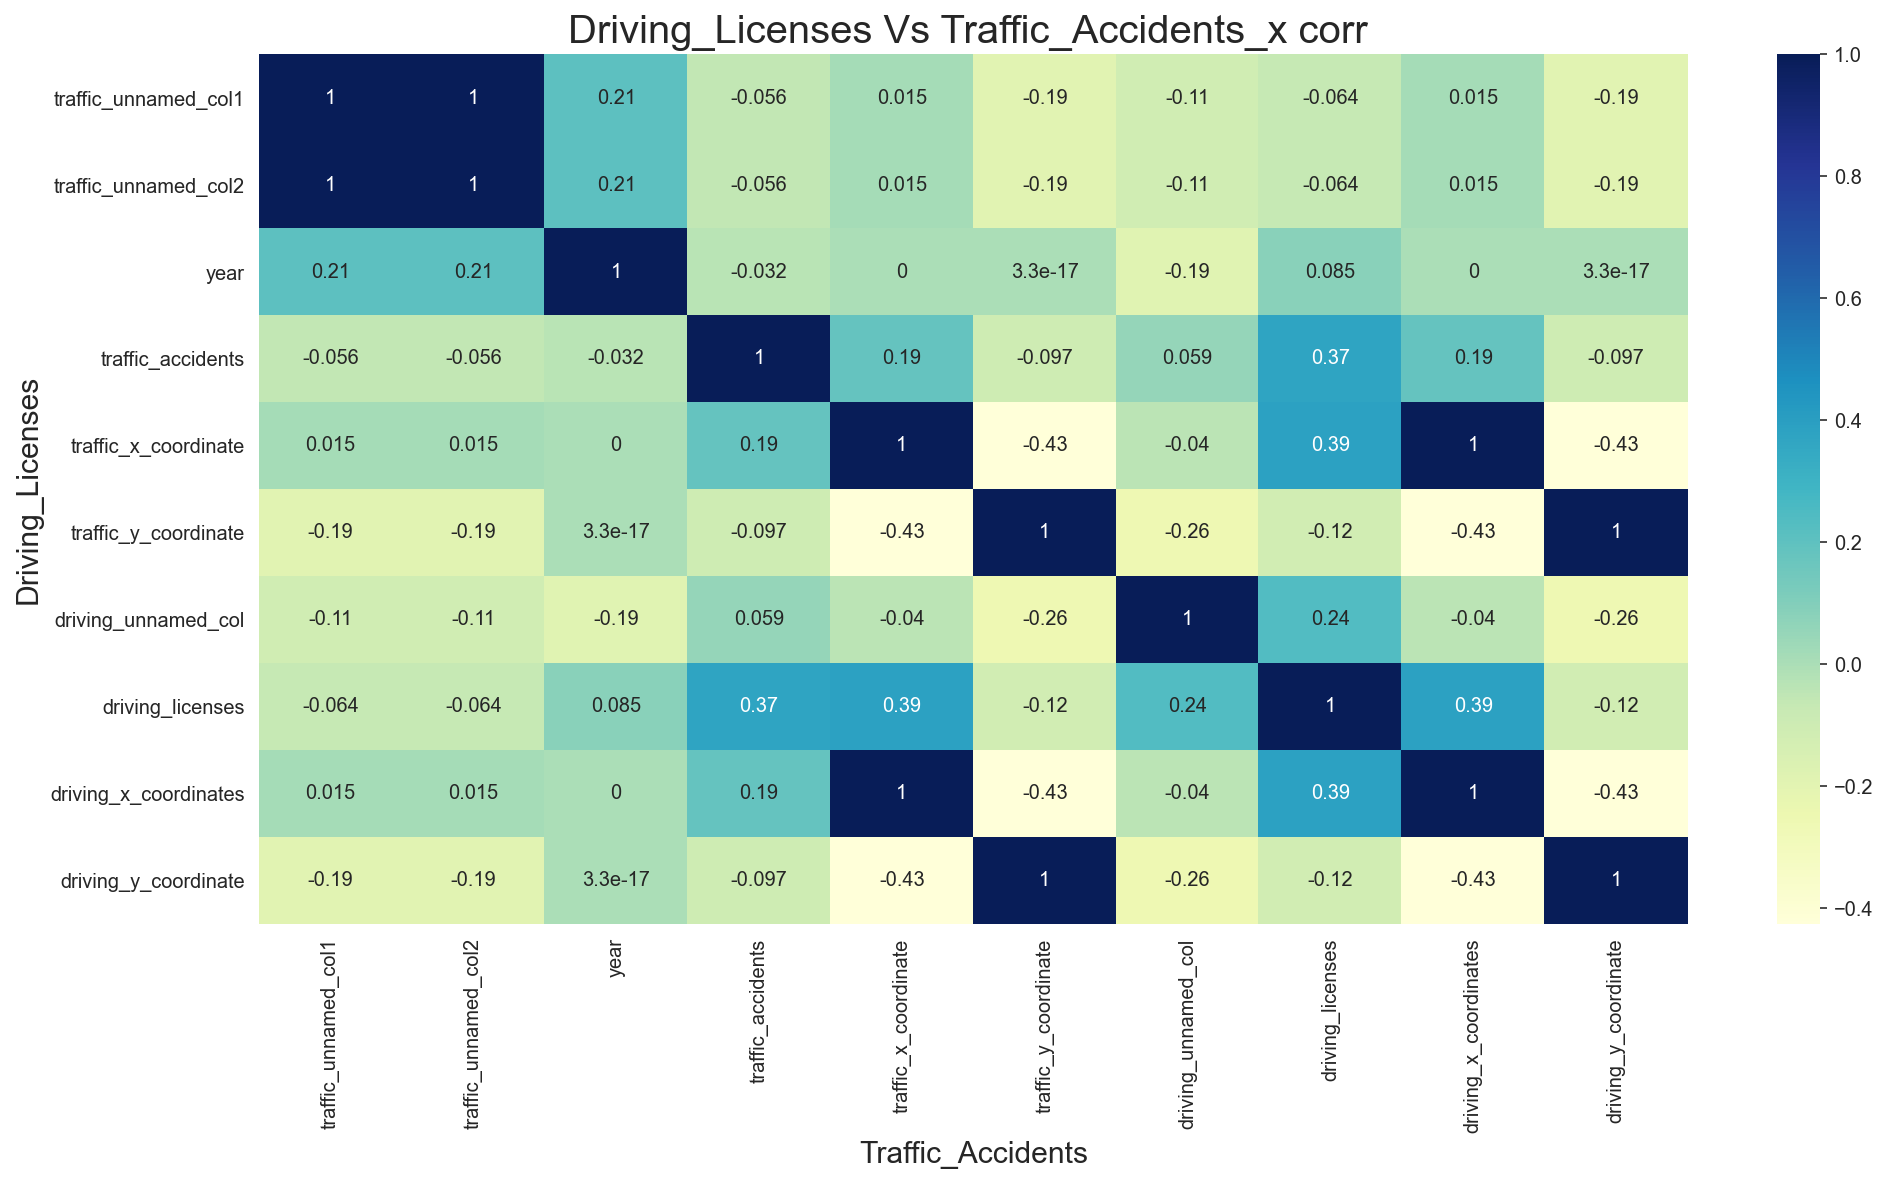

In [59]:


fig, ax7 = plt.subplots(figsize=(16,8))


sns.heatmap(combined_datasets.corr(), annot=True,ax=ax7,cmap="YlGnBu"); 
ax7.set_title('Driving_Licenses Vs Traffic_Accidents_x corr ', fontsize = 20);
# sns.color_palette("hls", 8)

plt.xlabel('Traffic_Accidents', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Driving_Licenses', fontsize = 15) ;


#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [60]:

list_of_columns=['traffic_accidents','driving_licenses','region']
list_of_titles=['Traffic Accidents','Driving Licenses','Region']
list_of_xlabels=['Number of Traffic Accidents','Number of Driving Licenses','Region']


In [61]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(16,16)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        if i == 0:
            ax[i].set_title(list_of_titles[i])
            ax[i].set_xlabel(list_of_xlabels[i])
        else:
            ax[i].set_title(list_of_titles[i])
            ax[i].set_xlabel(list_of_xlabels[i])

        # feel free to add more settings
        # Set titles, labels, etc here for each subplot

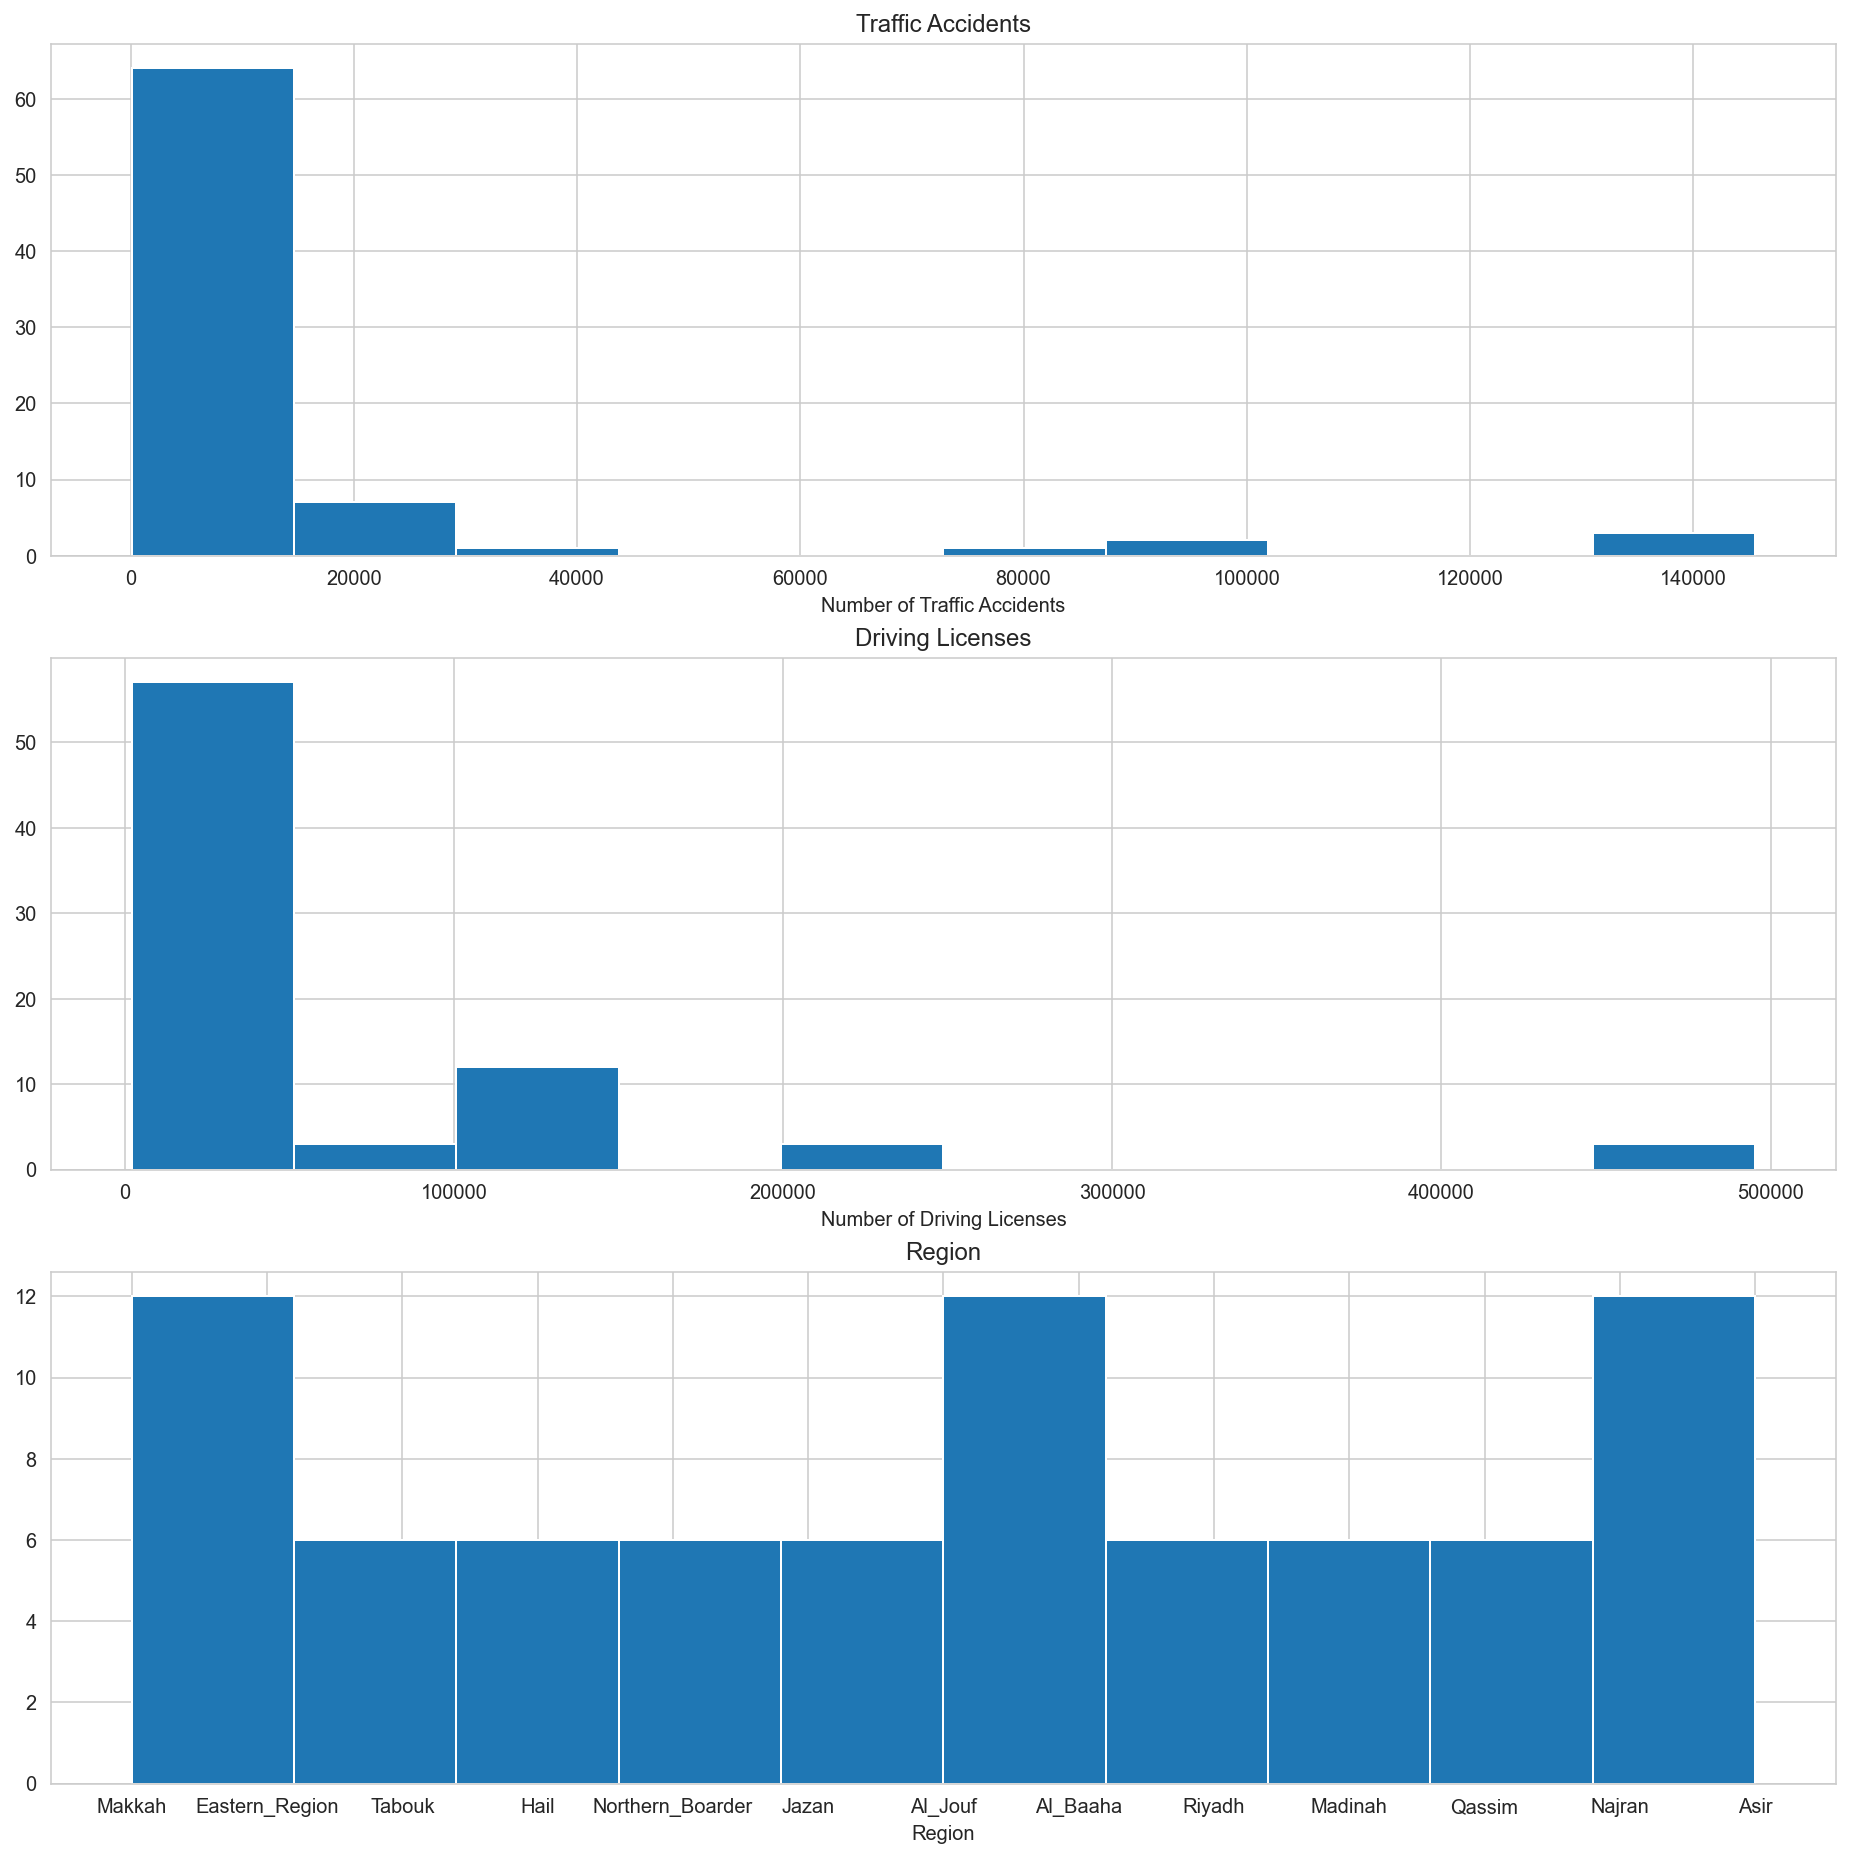

In [62]:
subplot_histograms(combined_datasets,list_of_columns,list_of_titles,list_of_xlabels)

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

D:\GACourse\an\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


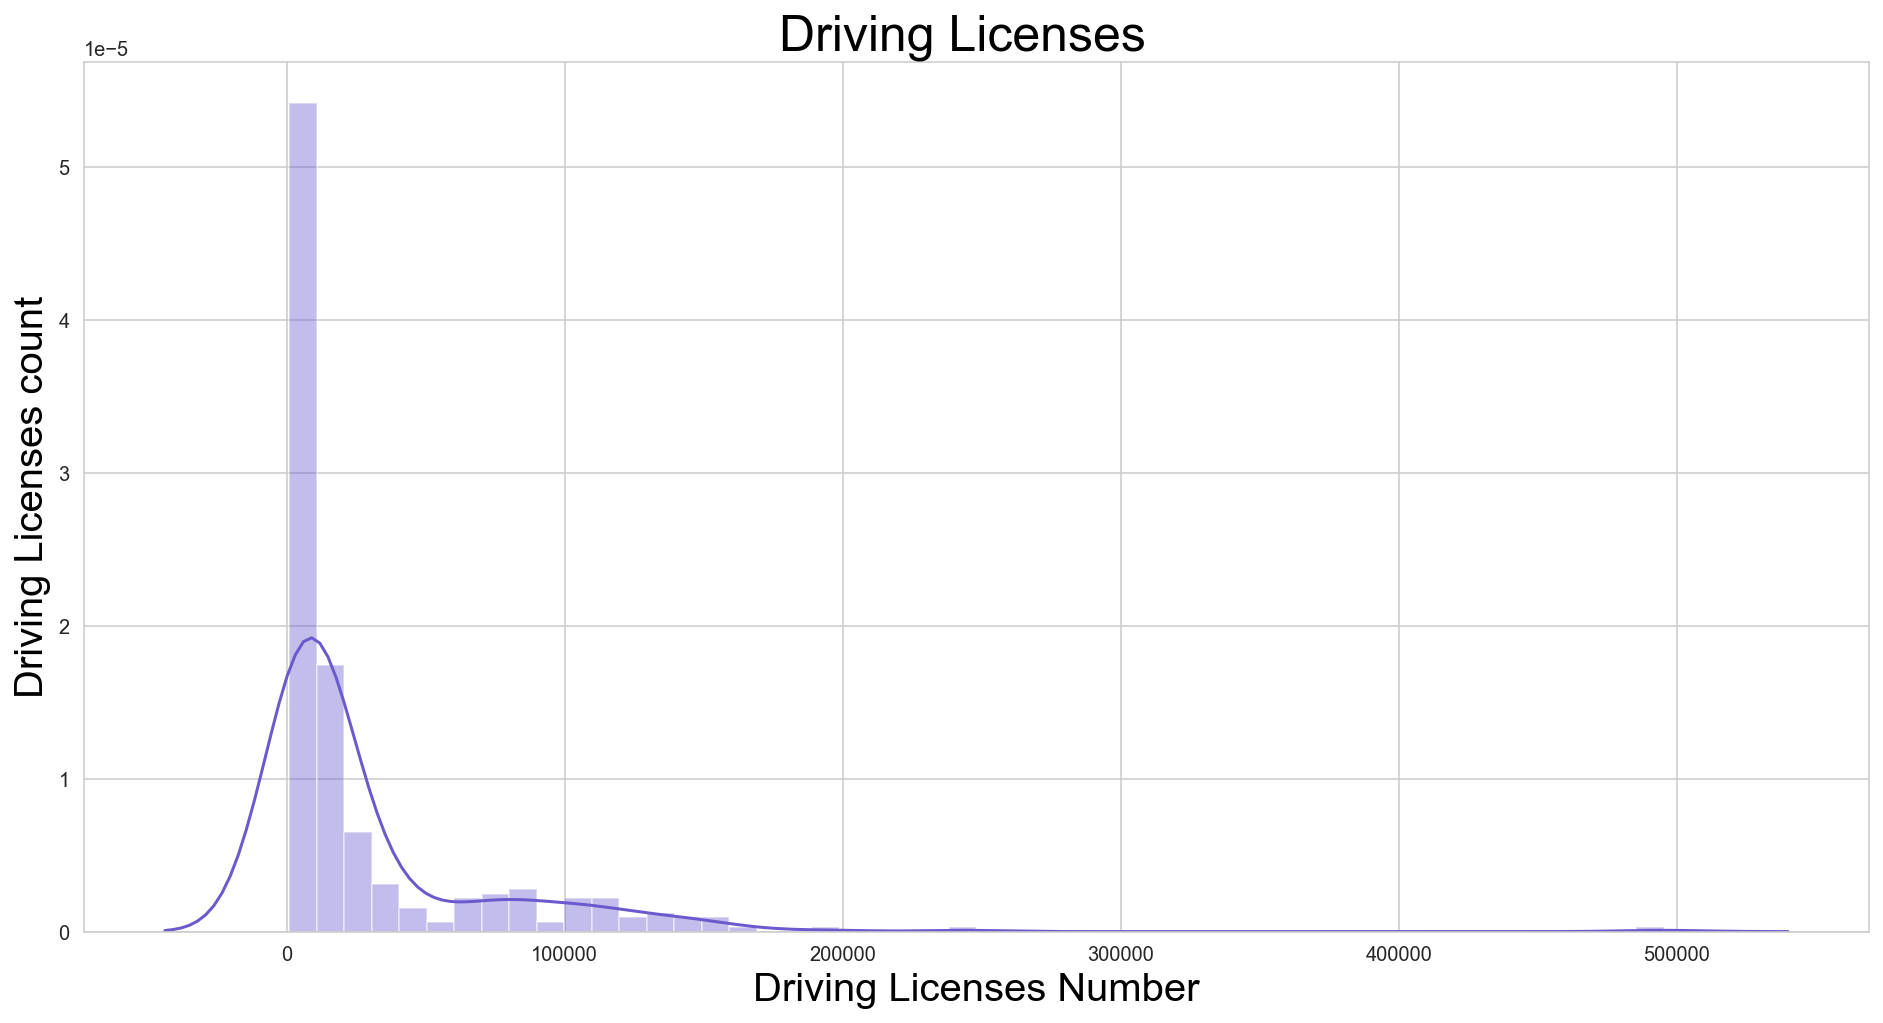

In [63]:
import seaborn as sns
fig= plt.subplots(figsize=(16,8))
sns.set_style('darkgrid')

sns.distplot(new_driving.driving_licenses,color="slateblue")
plt.xlabel('Driving Licenses Number', fontsize = 20,color='black') 
plt.ylabel('Driving Licenses count', fontsize = 20,color='black')
plt.title('Driving Licenses  ', fontsize = 25,color='black');
sns.set(rc={'axes.facecolor':'white'})


D:\GACourse\an\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


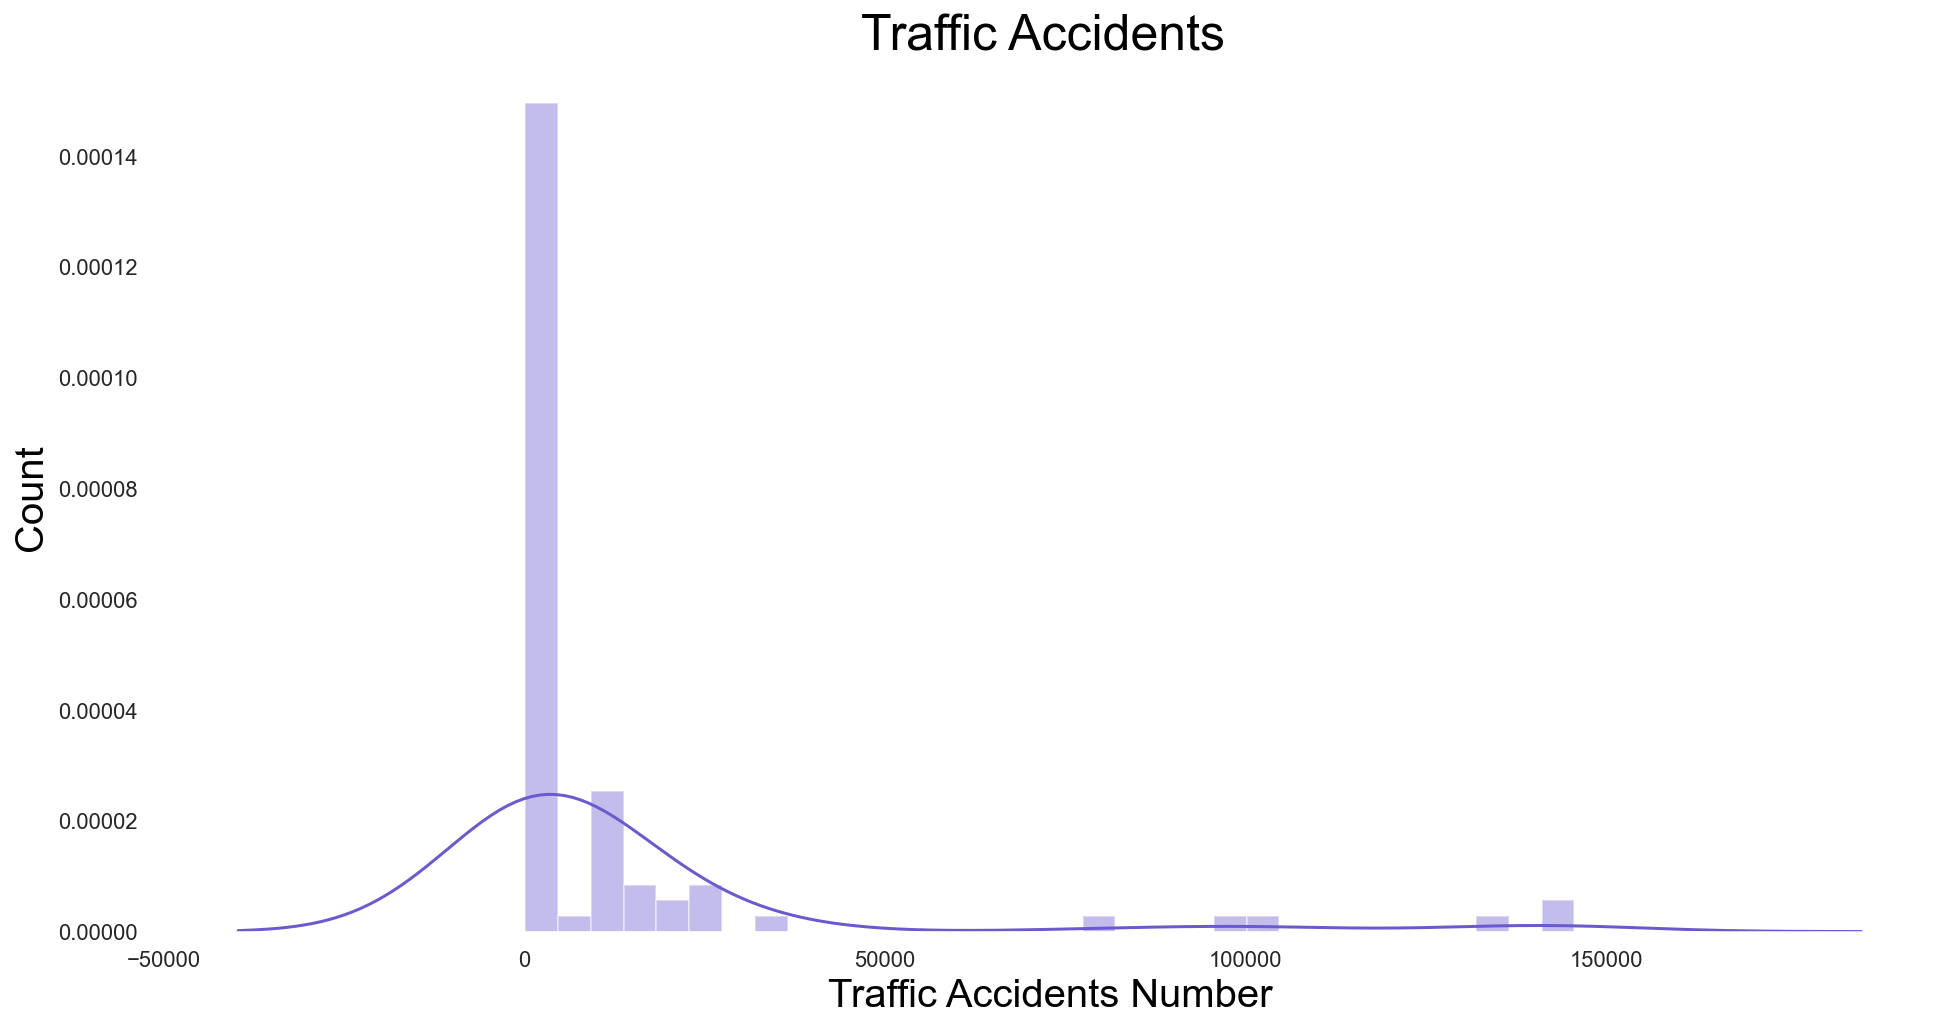

In [64]:
fig= plt.subplots(figsize=(16,8))
sns.set_style('darkgrid')

sns.distplot(new_traffic.traffic_accidents,color="slateblue")
plt.xlabel('Traffic Accidents Number', fontsize = 20,color='black') 
plt.ylabel('Count', fontsize = 20,color='black')
plt.title('Traffic Accidents ', fontsize = 25,color='black');
sns.set(rc={'axes.facecolor':'white'})

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [65]:

Traffic_Accidents_2017=[x for x in combined_datasets.traffic_accidents  for y in combined_datasets.year if y==2017]
Driving_Licenses_2017=[x for x in combined_datasets.driving_licenses  for y in combined_datasets.year if y==2017]

Driving_Licenses_2016=[x for x in combined_datasets.driving_licenses  for y in combined_datasets.year if y==2016]
Traffic_Accidents_2016=[x for x in combined_datasets.traffic_accidents  for y in combined_datasets.year if y==2016]


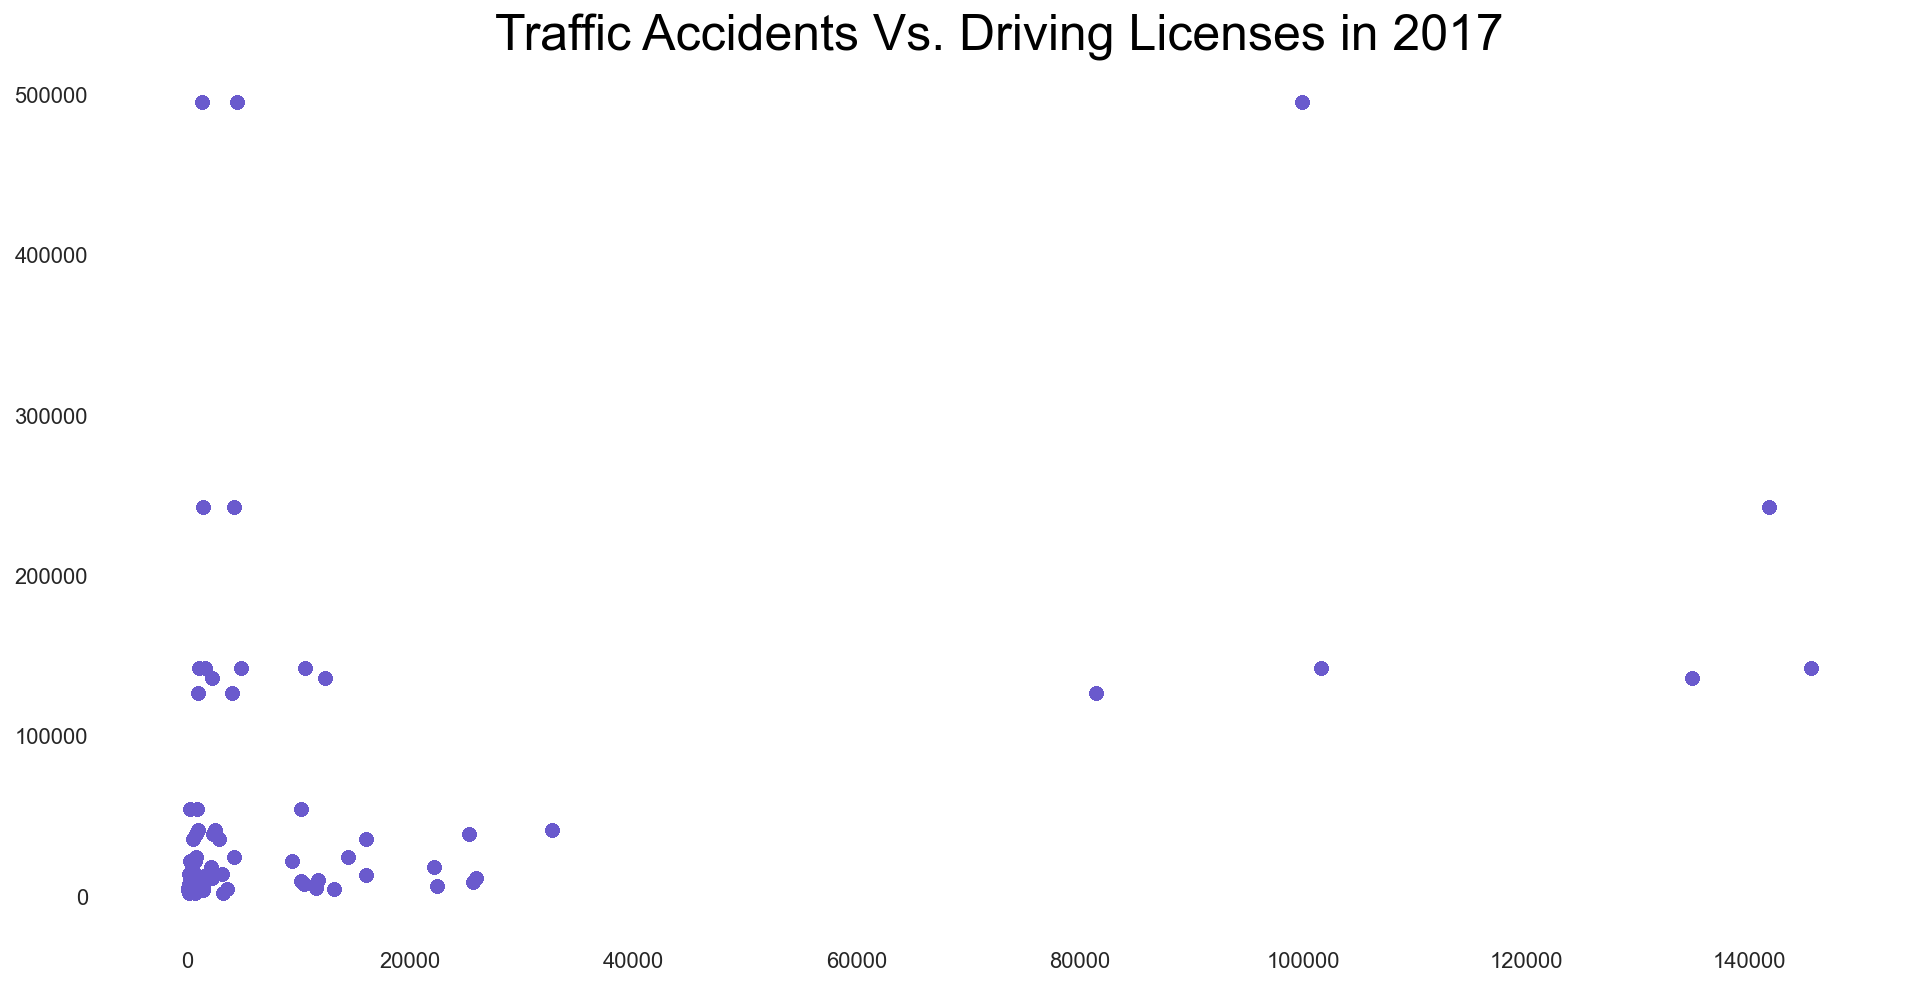

In [66]:

fig= plt.subplots(figsize=(16,8))

plt.scatter(Traffic_Accidents_2017, Driving_Licenses_2017,color="slateblue")
plt.title('Traffic Accidents Vs. Driving Licenses in 2017', fontsize = 25,color='black');
plt.show()

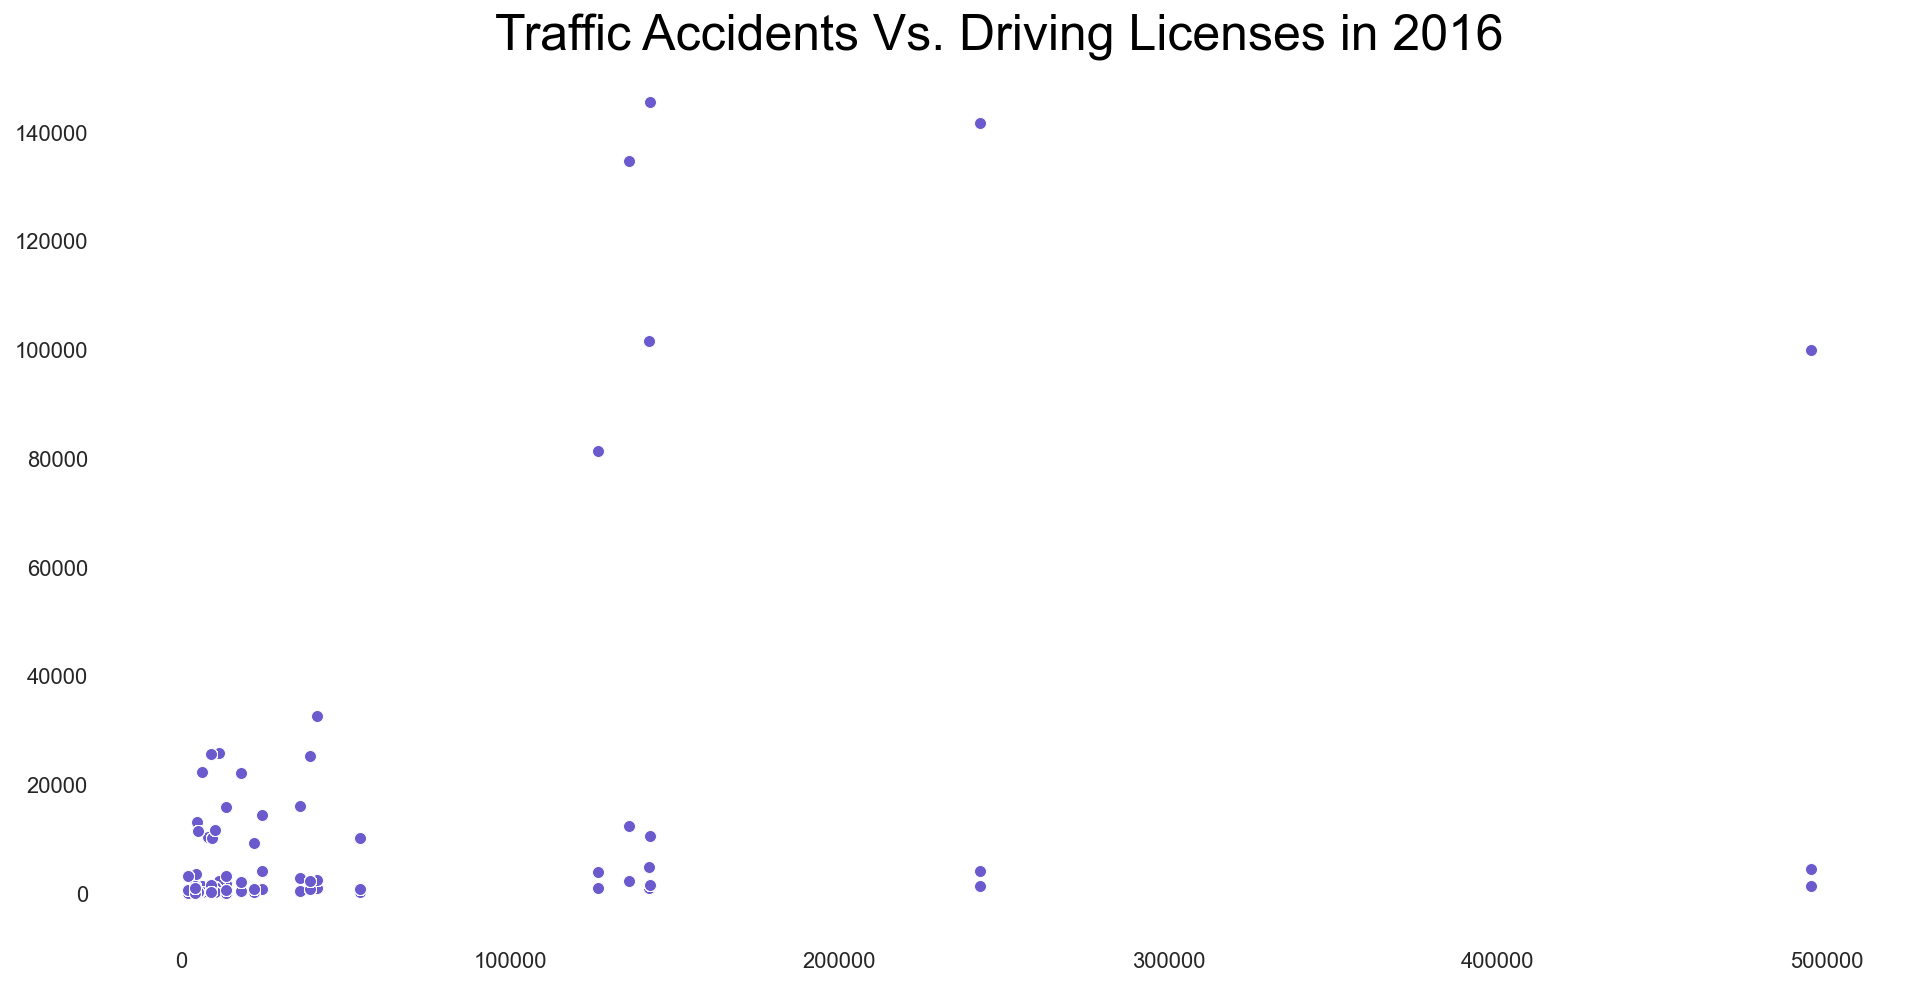

In [67]:

fig= plt.subplots(figsize=(16,8))

sns.scatterplot( x=Driving_Licenses_2016, y=Traffic_Accidents_2016,color="slateblue")

plt.title('Traffic Accidents Vs. Driving Licenses in 2016', fontsize = 25,color='black');
plt.show()

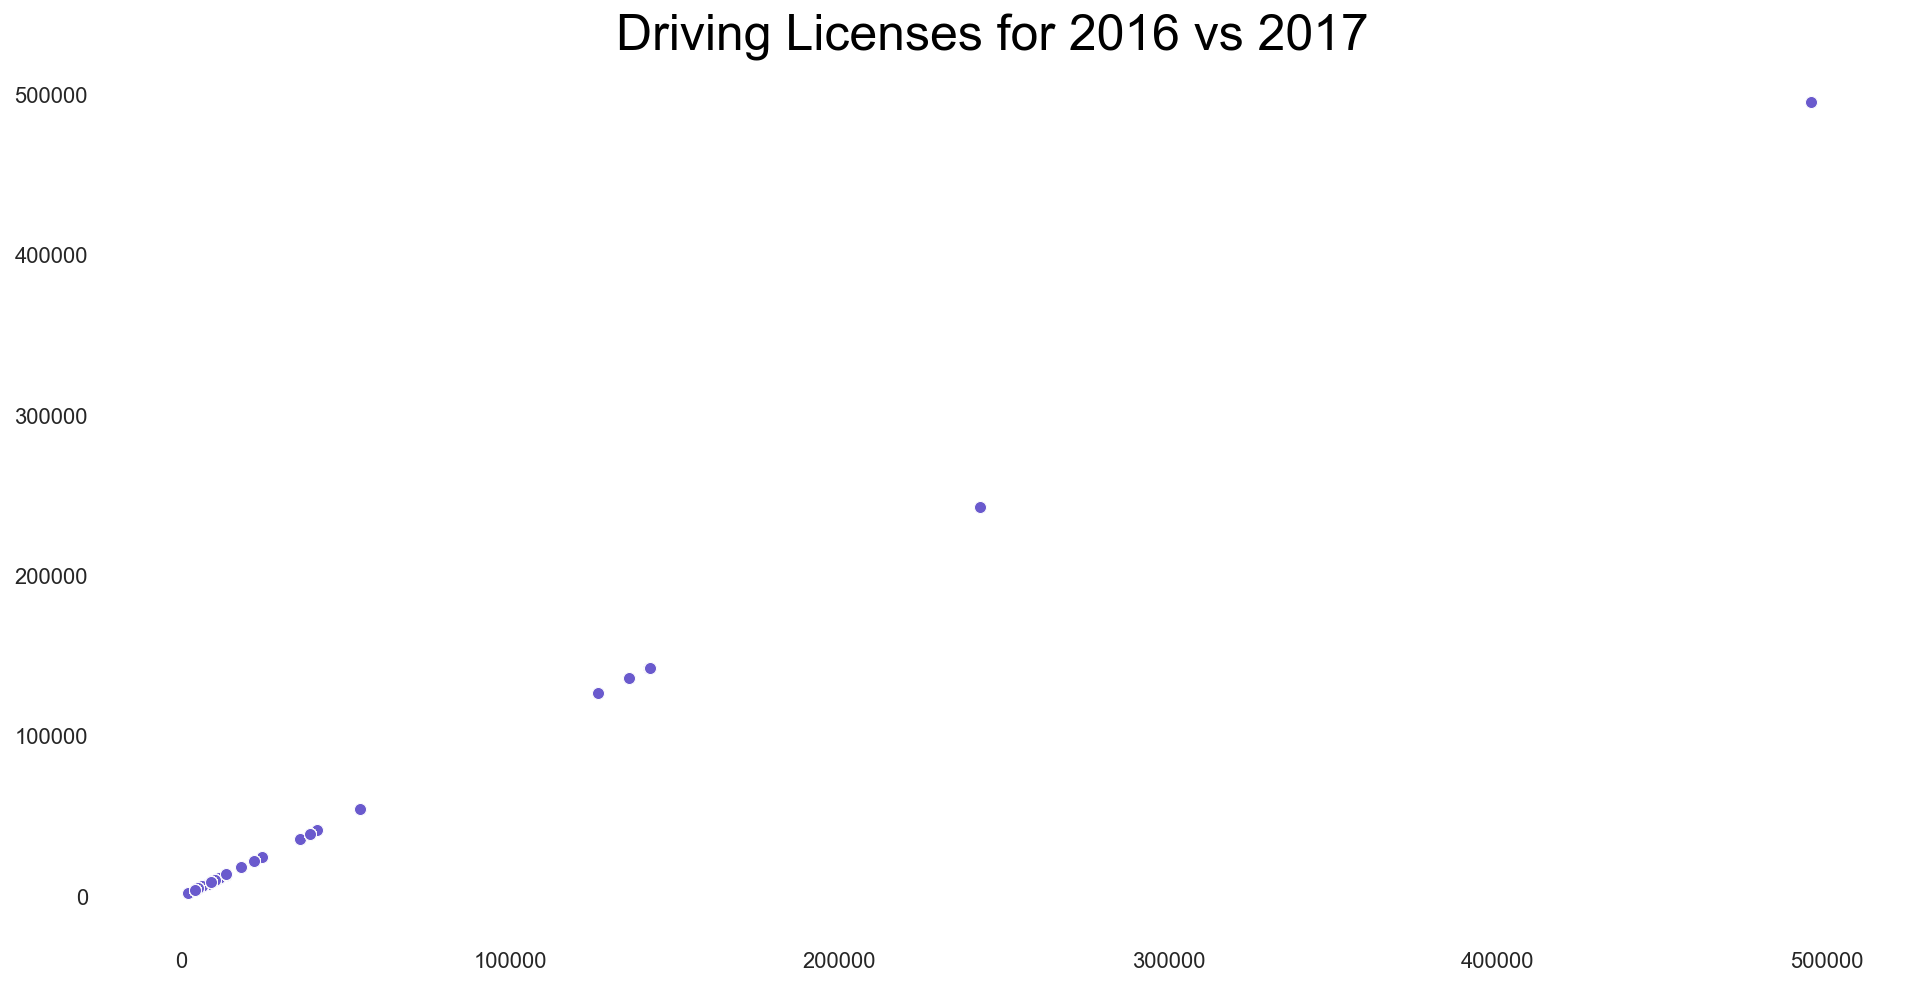

In [68]:
fig = plt.subplots(figsize=(16,8))

sns.scatterplot( x=Driving_Licenses_2016, y=Driving_Licenses_2017,sizes=(20,10),color="slateblue")

plt.title('Driving Licenses for 2016 vs 2017 ', fontsize = 25,color='black');
plt.show()


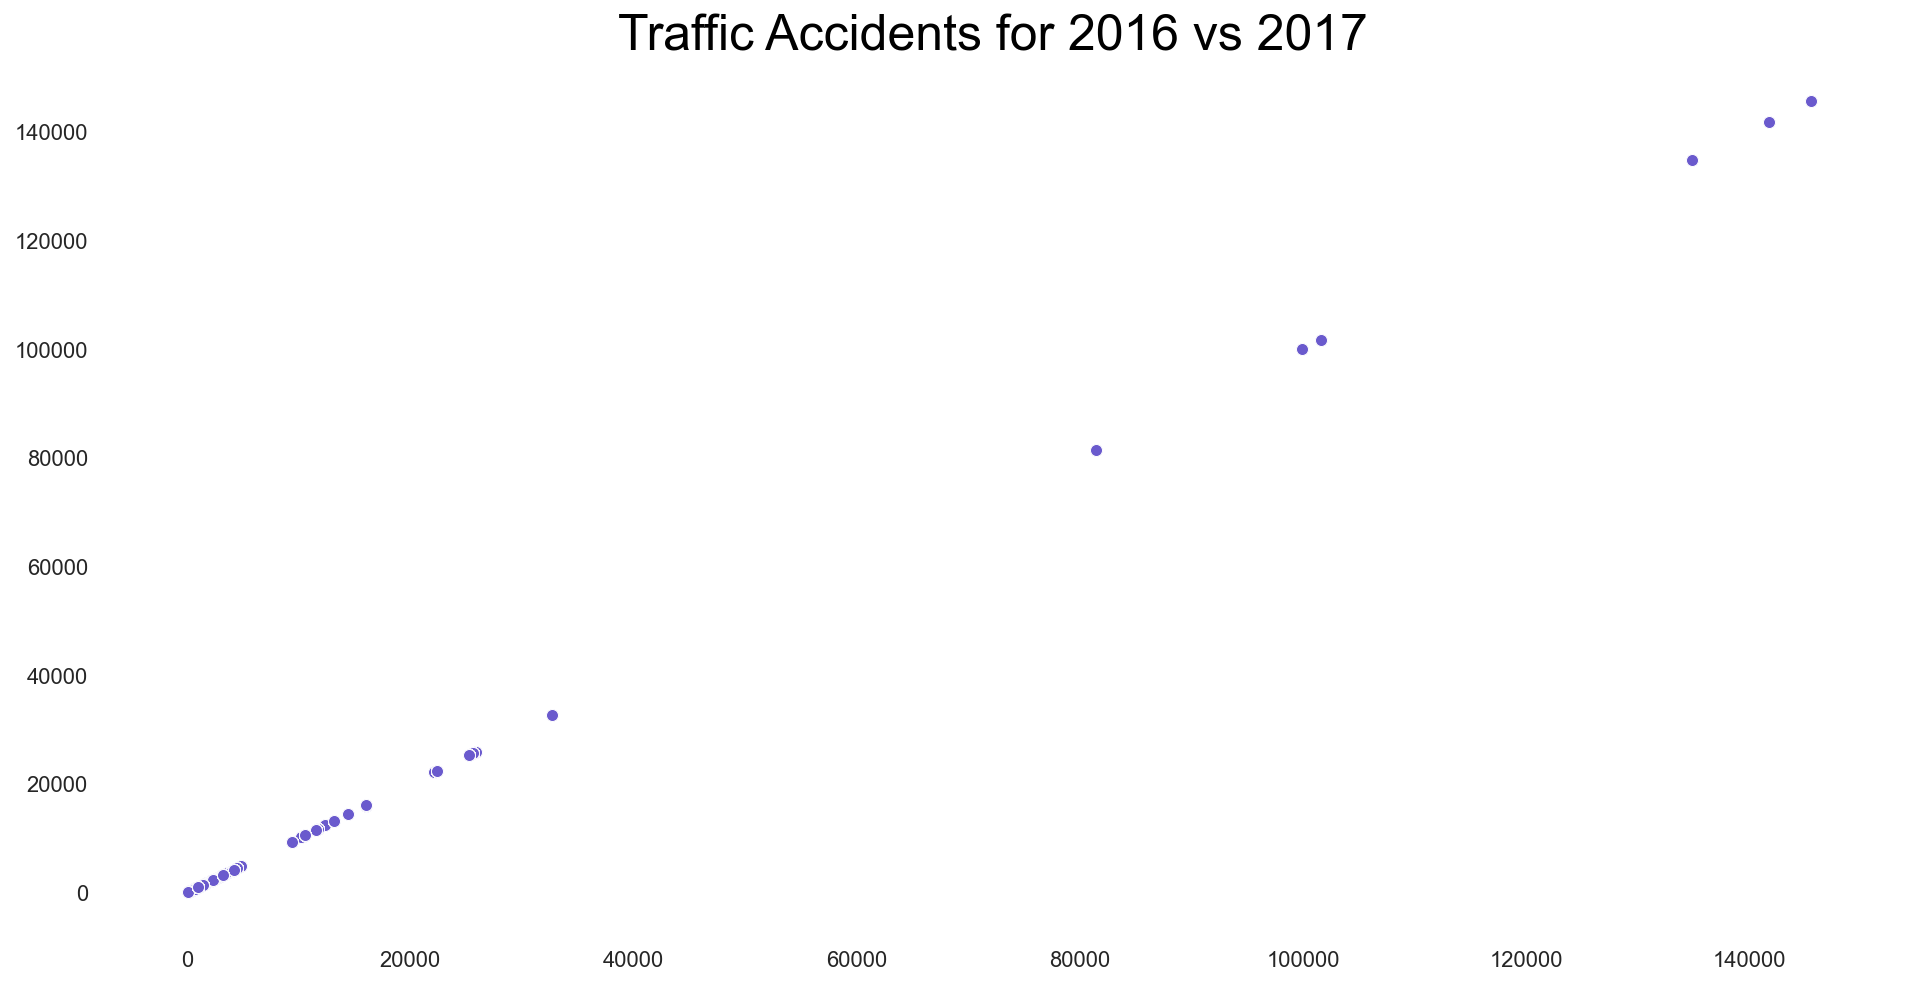

In [69]:
fig = plt.subplots(figsize=(16,8))

sns.scatterplot( x=Traffic_Accidents_2016, y=Traffic_Accidents_2017,color="slateblue")

plt.title('Traffic Accidents for 2016 vs 2017 ', fontsize = 25,color='black');
plt.show()


#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

I standardized all of my numrical value so I can plot all of them in the same fig.

In [70]:
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand


In [71]:
 numrical_value= var_standardized(numrical_value)

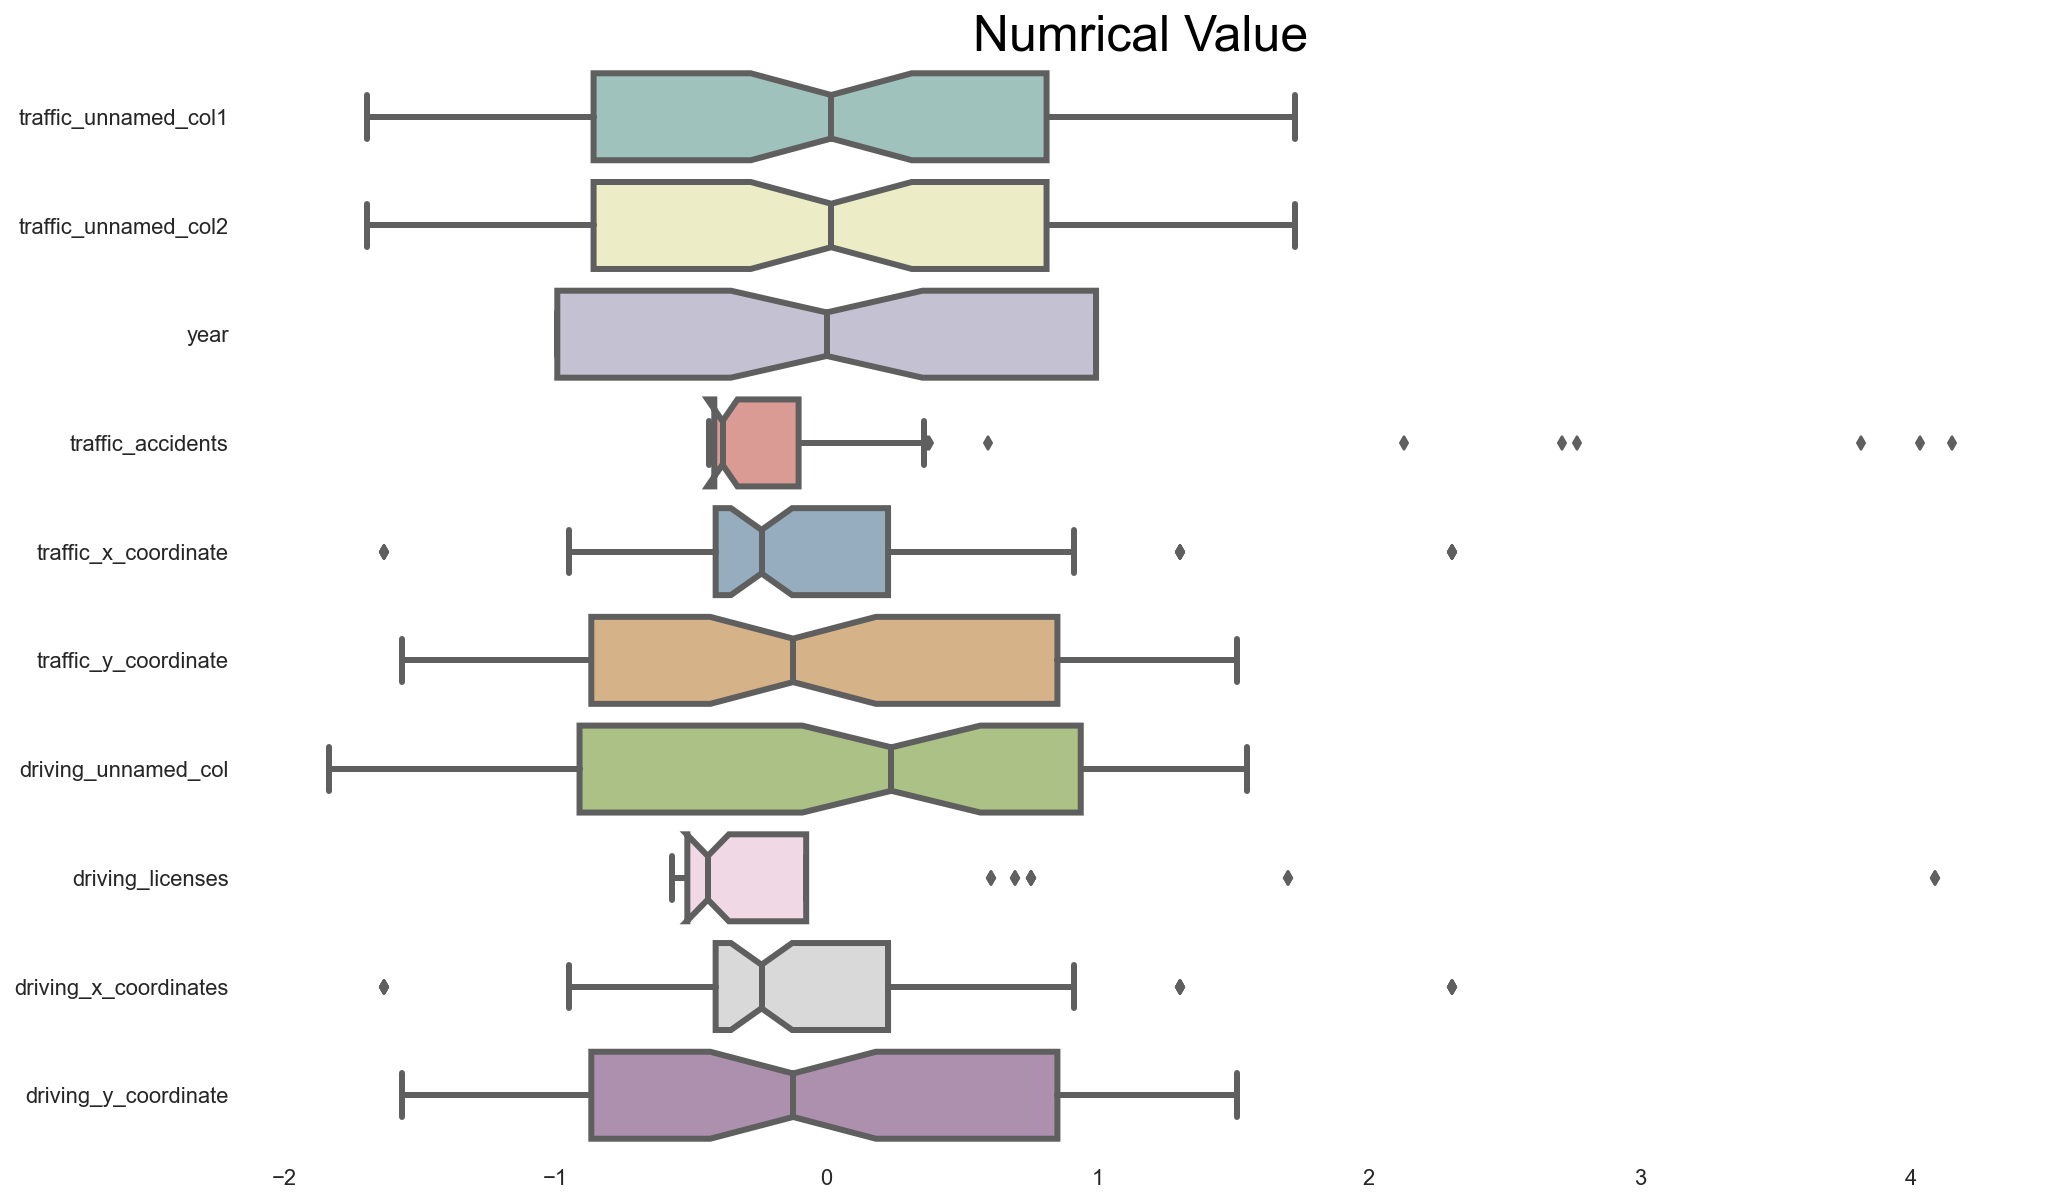

In [72]:
fig,ax=plt.subplots(figsize=(16,10))

sns.boxplot(data=numrical_value, orient='h', fliersize=5, 
                 palette="Set3", linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.title('Numrical Value', fontsize = 25,color='black');


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

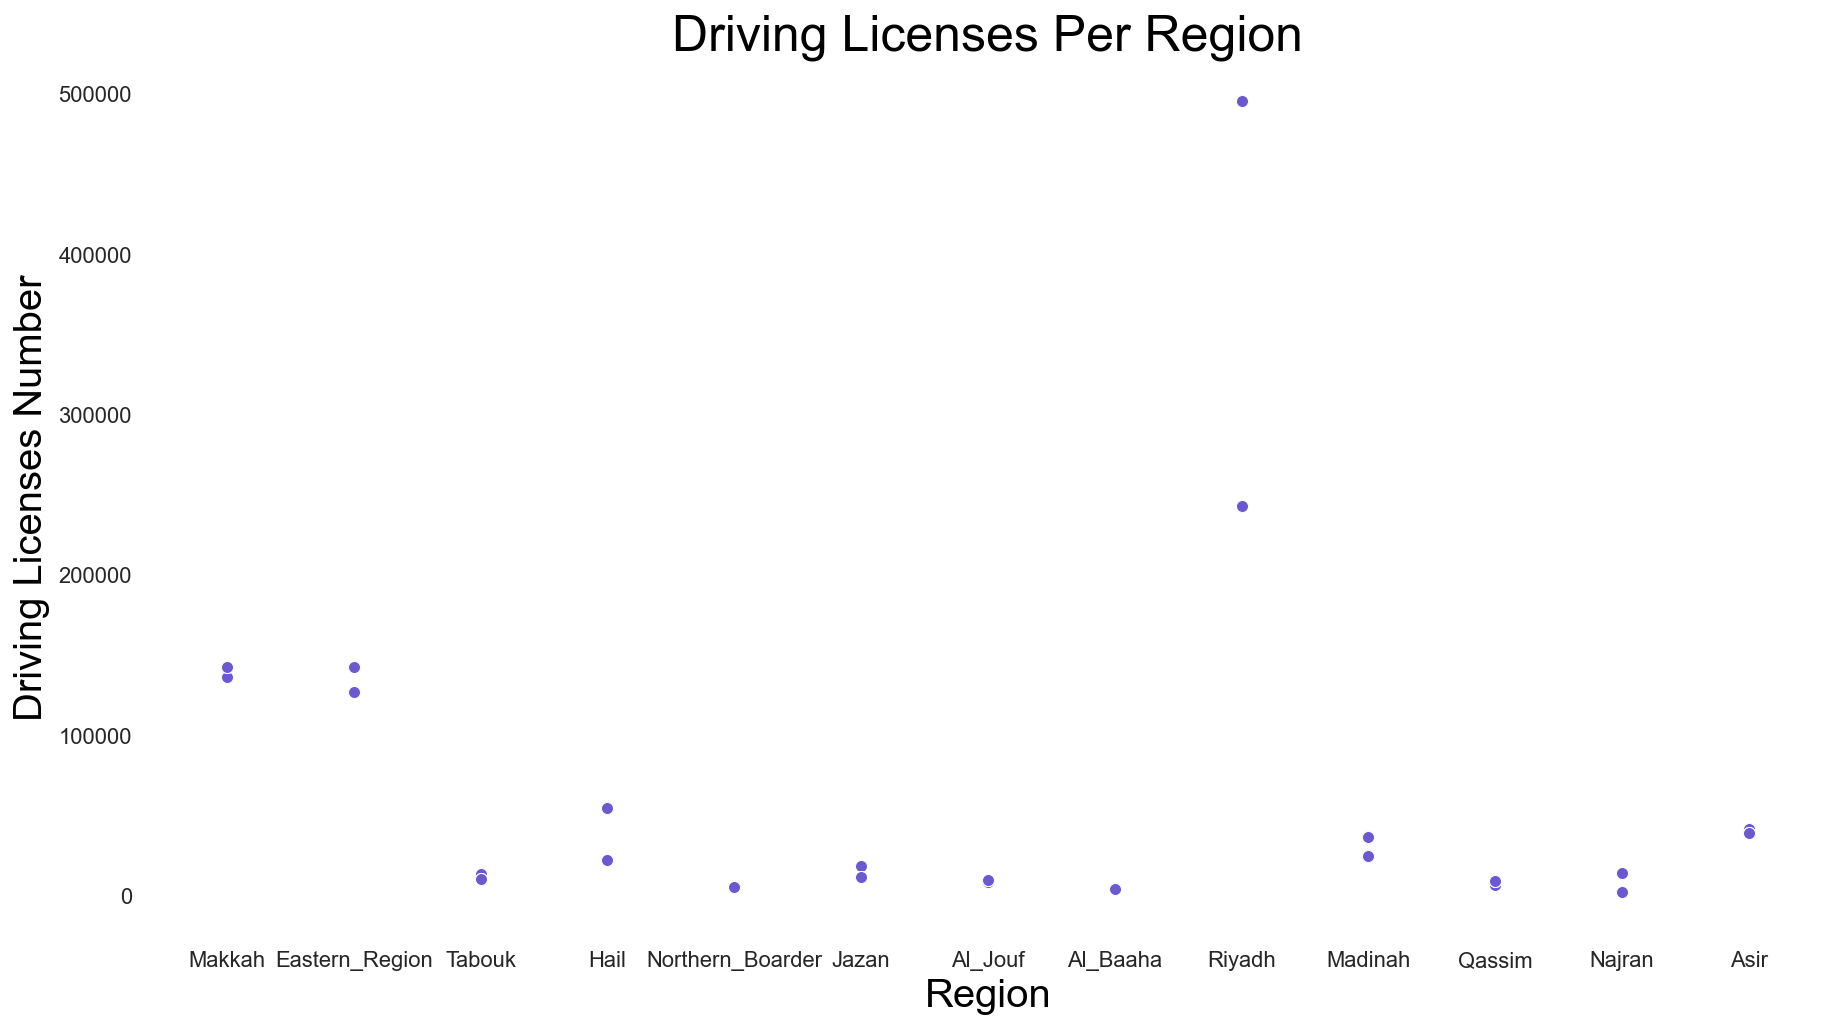

In [73]:
fig = plt.figure(figsize=(15,8))

sns.scatterplot(data=combined_datasets, y='driving_licenses', x='region',color="slateblue")
plt.title('Driving Licenses Per Region', fontsize = 25,color='black');
plt.xlabel('Region', fontsize = 20,color='black') 
plt.ylabel('Driving Licenses Number', fontsize = 20,color='black')
plt.show()

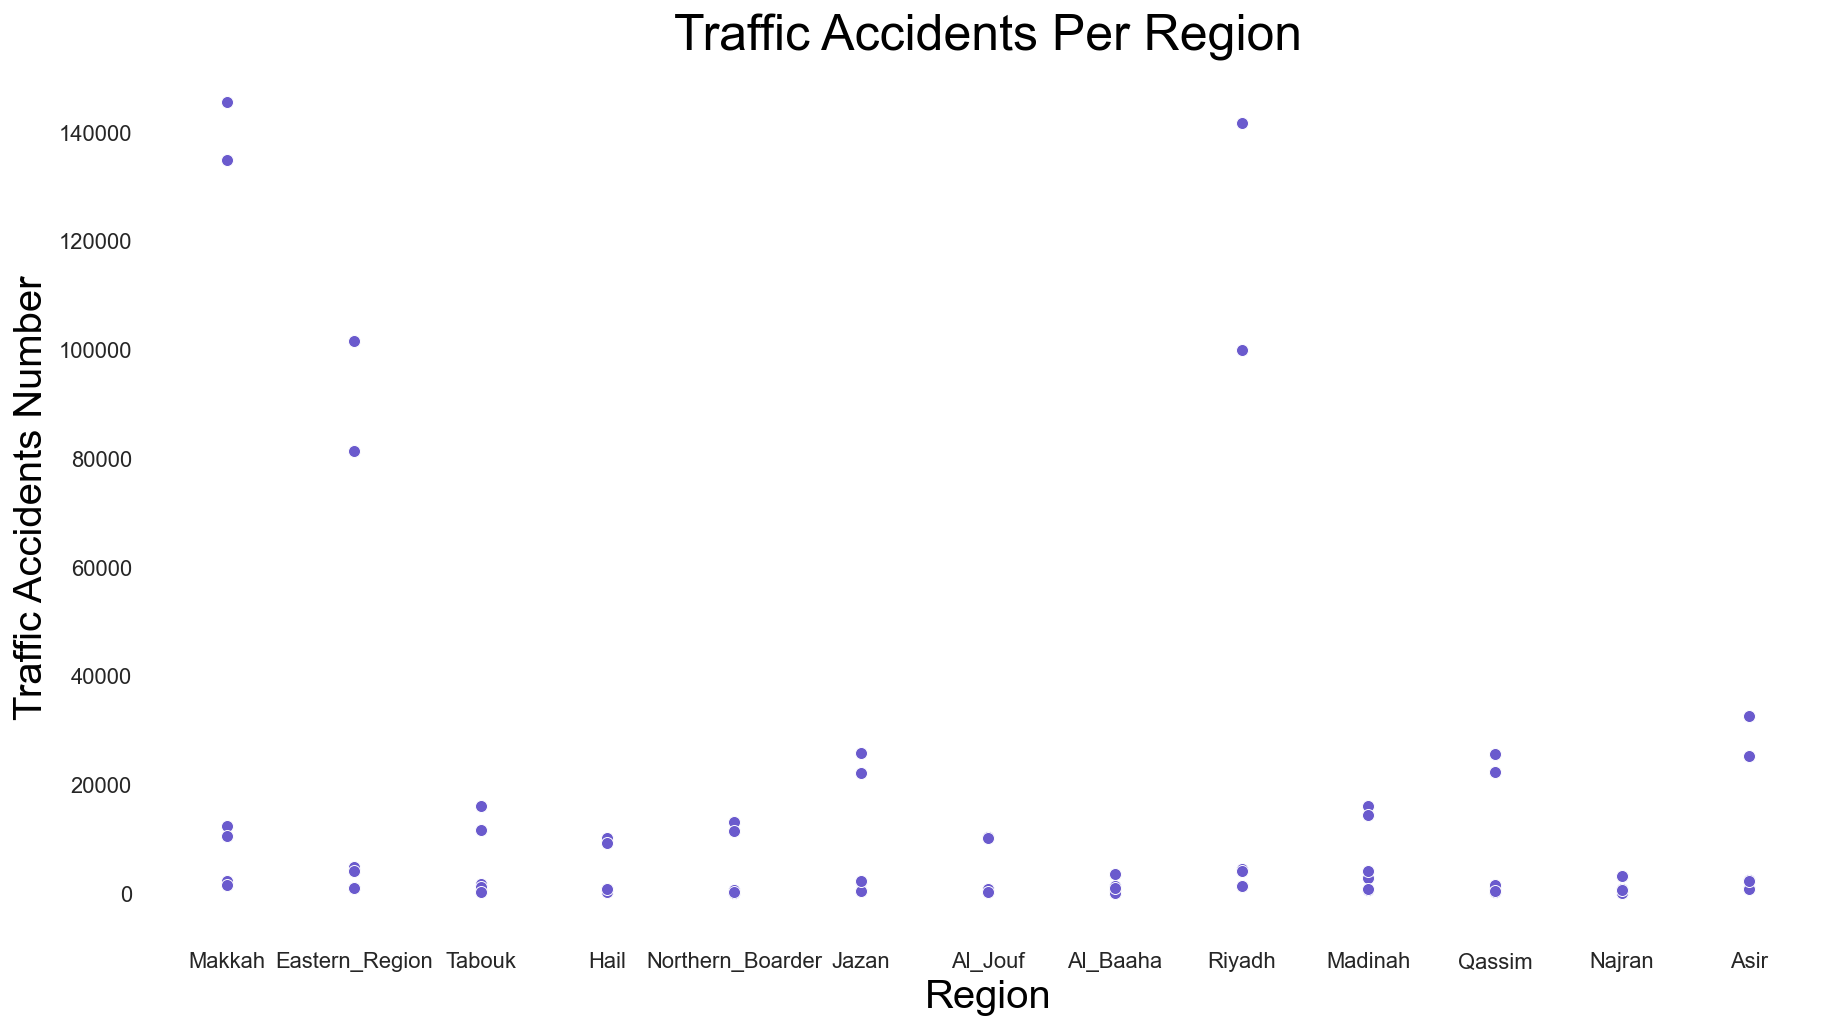

In [74]:
fig = plt.figure(figsize=(15,8))

sns.scatterplot(data=combined_datasets, y='traffic_accidents', x='region',color="slateblue")
plt.title('Traffic Accidents Per Region', fontsize = 25,color='black');
plt.xlabel('Region', fontsize = 20,color='black') 
plt.ylabel('Traffic Accidents Number', fontsize = 20,color='black')
plt.show()

In [75]:
combined_datasets['combined_datasets_devided']=combined_datasets.traffic_accidents/combined_datasets.driving_licenses

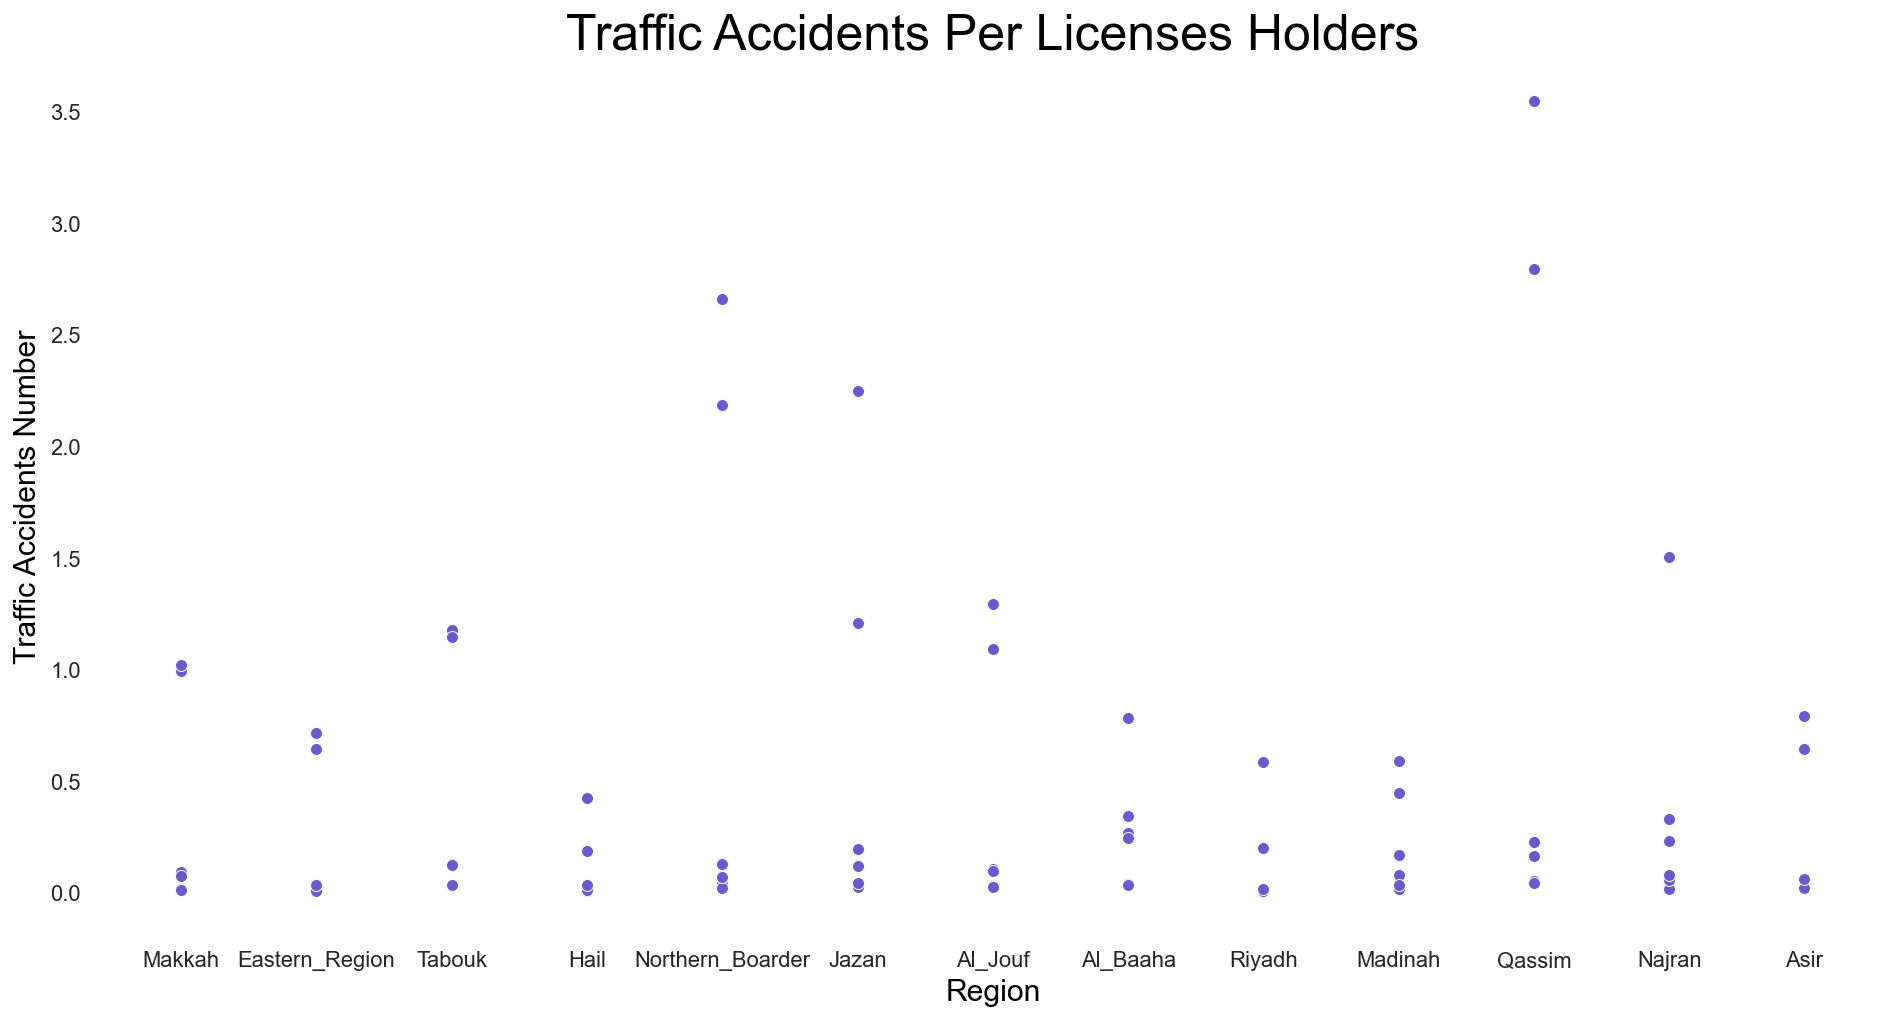

In [76]:
fig = plt.figure(figsize=(16,8))

sns.scatterplot(data=combined_datasets, y='combined_datasets_devided', x='region',color="slateblue")
plt.xlabel('Region', fontsize = 15,color='black') 
plt.ylabel('Traffic Accidents Number', fontsize = 15,color='black')
plt.title('Traffic Accidents Per Licenses Holders', fontsize = 25,color='black');

plt.show()

- From the previous figures, we can say that Riyadh contains the largest number of license holders, and Makkah has the highest percentage in terms of the number of accidents. As for Qassim, it contains the largest number of accidents relative to the number of license holders, at a rate that may reach 3.5.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

- For Traffic Accidents :
    
the mean = 13868.038462

the std = 31716.885363 

minimum vaue = 112.000000 

maximim value = 145541.000000

- For Driving Licenses:
    
the mean = 62507.000000

the std = 105891.322576 

minimum vaue = 2153.000000

maximim value = 495307.000000






#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:For all of the numrical col the distribution isn't normal;positive skew.

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

For all of the numrical col the distribution isn't normal;positive skew.
for example:




traffic_accidents:
|25% ===> 721.000000

|50% ===> 1682.5000000

|75% ===> 43.343000


driving_licenses:


|25% ===> 8091.000000

|50% ===> 16085.000000

|75% ===> 54507.000000



These data give us clear indications to verify more about the causes of accidents in the city of Makkah Al-Mukarramah. Therefore, I used data that contain more information about most streets and roads in which car accidents occur, and then verify whether or not traffic signals exist, or are these roads close to residential neighborhoods or near From the Haram, and on this basis, the necessary actions are taken to reduce them, but unfortunately I could not separate these data to represent them.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [77]:
# Code

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

In [78]:
traffic_accidents=pd.read_csv('saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008.csv',sep=';')
traffic_accidents.head()

,Year,Region,Indicator,Value,geo_shape,geo_point_2d
0,2016,Riyadh,No. of Casualties - Dead,1430,"{""type"": ""Polygon"", ""coordinates"": [[[41.68033...","23.0814341634,45.5857512766"
1,2016,Eastern Region,No. of Casualties - Dead,1113,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[50...","23.2883307307,50.1478302439"
2,2016,Eastern Region,No. of Casualties - Injured,4893,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[50...","23.2883307307,50.1478302439"
3,2016,Hail,No. of Casualties - Dead,299,"{""type"": ""Polygon"", ""coordinates"": [[[39.11323...","27.400845724,41.4406960508"
4,2016,Jazan,No. of Casualties - Dead,514,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[42...","17.2072313962,42.6525807422"


In [79]:
from pandas import option_context

with option_context('display.max_colwidth', 900):
    display(traffic_accidents.head(1))

,Year,Region,Indicator,Value,geo_shape,geo_point_2d
0,2016,Riyadh,No. of Casualties - Dead,1430,"{""type"": ""Polygon"", ""coordinates"": [[[41.6803342932, 23.7233496029], [41.6806642809, 23.7278396857], [41.6815037904, 23.7325092744], [41.6823338005, 23.73700986], [41.6843338656, 23.7411594453], [41.6854939018, 23.7438299996], [41.6864944206, 23.7481695832], [41.6873339383, 23.7515001478], [41.6891645037, 23.7543302084], [41.6934941739, 23.7584903059], [41.6966543014, 23.7609903674], [41.7033145769, 23.7651499769], [41.7066552177, 23.7668205244], [41.7098153544, 23.7678105585], [41.7121449565, 23.7683205798], [41.7314763286, 23.7684806821], [41.7344664546, 23.7699807246], [41.7384661282, 23.7711507663], [41.7412967651, 23.7696507537], [41.7456269678, 23.7684807548], [41.7487871096, 23.7686502741], [41.7536268181, 23.7703208292], [41.7561274179, 23.7724808811], [41.7582874993, 23.7751509406], [41.7589575175, 23.7771509802], [41.7599575496, 23.7793105244], [41.7614576072, 23.7809810624...","23.0814341634,45.5857512766"


The coordinates values in geo_shape are the street coordinates that accidents accurse in, so these coordinates can tell us the most dangerous street to make more investigation about them to see what are the reasons behind it.

To seperate the coordinates we can use this cod but with more powerful device.


 for key, value in traffic_accidents.geo_shape.iteritems() :
 
    print (key, value)

 list1 = traffic_accidents.geo_shape
 
 list2 = []
 
 for x in list1:
 
    list2 += x if type(x) == list else [x]


In [80]:
traffic_accidents['Dead']=traffic_accidents.loc[traffic_accidents['Indicator'] == 'No. of Casualties - Dead', 'Indicator']
traffic_accidents['Injured']=traffic_accidents.loc[traffic_accidents['Indicator'] == 'No. of Casualties - Injured', 'Indicator']
traffic_accidents['Accidents']=traffic_accidents.loc[traffic_accidents['Indicator'] == 'No. of Accidents', 'Indicator']


In [81]:
Dead=traffic_accidents[['Year','Region','Value','Dead']]
Injured=traffic_accidents[['Year','Region','Value','Injured']]
Accidents=traffic_accidents[['Year','Region','Value','Accidents']]

In [82]:
Dead=Dead.dropna(subset=['Dead'],axis=0)
Injured=Injured.dropna(subset=['Injured'],axis=0)
Accidents=Accidents.dropna(subset=['Accidents'],axis=0)

In [83]:
# n_by_Value1 =Deadu.groupby(["Year","Region"])["Value"].sum()
# n_by_Value2 = Injured.groupby(["Year","Region"])["Value"].sum()
# n_by_Value3 = Accidents.groupby(["Year","Region"])["Value"].sum()


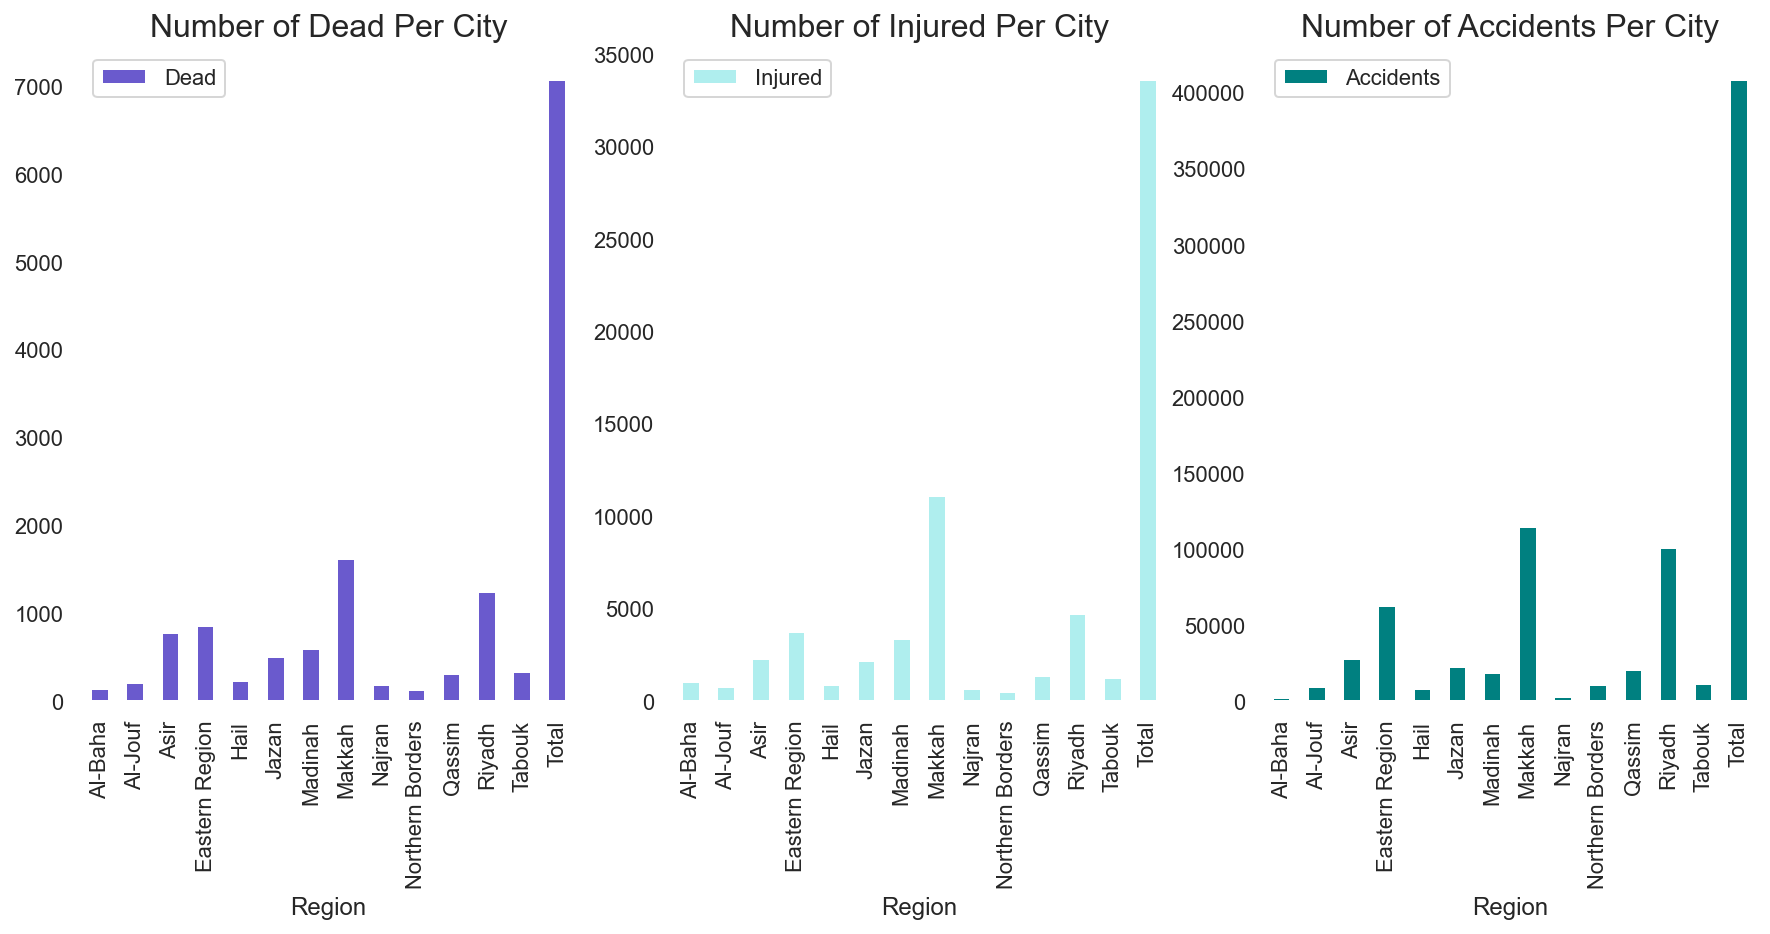

In [84]:

fig, ax = plt.subplots(1,3, figsize=(20,16));

Dead.groupby('Region').mean().plot(kind='bar',y='Value', figsize=(15,6),ax=ax[0],color="slateblue");
Injured.groupby('Region').mean().plot(kind='bar',y='Value', figsize=(15,6),ax=ax[1],color="paleturquoise");
Accidents.groupby('Region').mean().plot(kind='bar',y='Value', figsize=(15,6),ax=ax[2],color="teal");

# # Set the title.
ax[0].set_title('Number of Dead Per City', fontsize=16);
ax[1].set_title('Number of Injured Per City', fontsize=16);
ax[2].set_title('Number of Accidents Per City', fontsize=16);



ax[0].legend( ['Dead'],loc='upper left', frameon=True)
ax[1].legend( ['Injured'],loc='upper left', frameon=True)
ax[2].legend( ['Accidents'],loc='upper left', frameon=True);

In [85]:
traffic_accidents_p=traffic_accidents.pivot_table(index=["Year","Region"], 
                    columns='Indicator', 
                    values='Value')  
traffic_accidents_p

Indicator              No. of Accidents  No. of Casualties - Dead  \
Year Region                                                         
2016 Al-Baha                       3618                       185   
     Al-Jouf                      10212                       245   
     Asir                         32684                       983   
     Eastern Region              101619                      1113   
     Hail                         10199                       299   
     Jazan                        25873                       514   
     Madinah                      14475                       822   
     Makkah                      134838                      2243   
     Najran                        3235                       173   
     Northern Borders             13196                       193   
     Qassim                       25664                       397   
     Riyadh                      141736                      1430   
     Tabouk                       16031                       434   
     Total                       533380                      9031   
2017 Al-Baha                       1414                       134   
     Al-Jouf                      10469                       240   
     Asir                         25245                       828   
     Eastern Region               81433                       963   
     Hail                          9379                       265   
     Jazan                        22161                       466   
     Madinah                      16070                       580   
     Makkah                      145541                      1641   
     Najran                        3193                       194   
     Northern Borders             11540                       112   
     Qassim                       22405                       319   
     Riyadh                       99925                      1399   
     Tabouk                       11713                       348   
     Total                       460488                      7489   
2018 Al-Baha                       1764                       111   
     Al-Jouf                       7355                       157   
     Asir                         25964                       696   
     Eastern Region               45077                       661   
     Hail                          6955                       193   
     Jazan                        19572                       563   
     Madinah                      20547                       483   
     Makkah                      103973                      1301   
     Najran                        3124                       176   
     Northern Borders             10705                        75   
     Qassim                       17510                       225   
     Riyadh                       79884                      1091   
     Tabouk                       10034                       293   
     Total                       352464                      6025   
2019 Al-Baha                       1644                       122   
     Al-Jouf                       8487                       149   
     Asir                         25342                       603   
     Eastern Region               21235                       688   
     Hail                          4784                       168   
     Jazan                        20591                       477   
     Madinah                      21689                       457   
     Makkah                       73704                      1259   
     Najran                        1474                       162   
     Northern Borders              5406                       131   
     Qassim                       16862                       284   
     Riyadh                       79474                      1026   
     Tabouk                        7089                       228   
     Total                       287781                      5754  

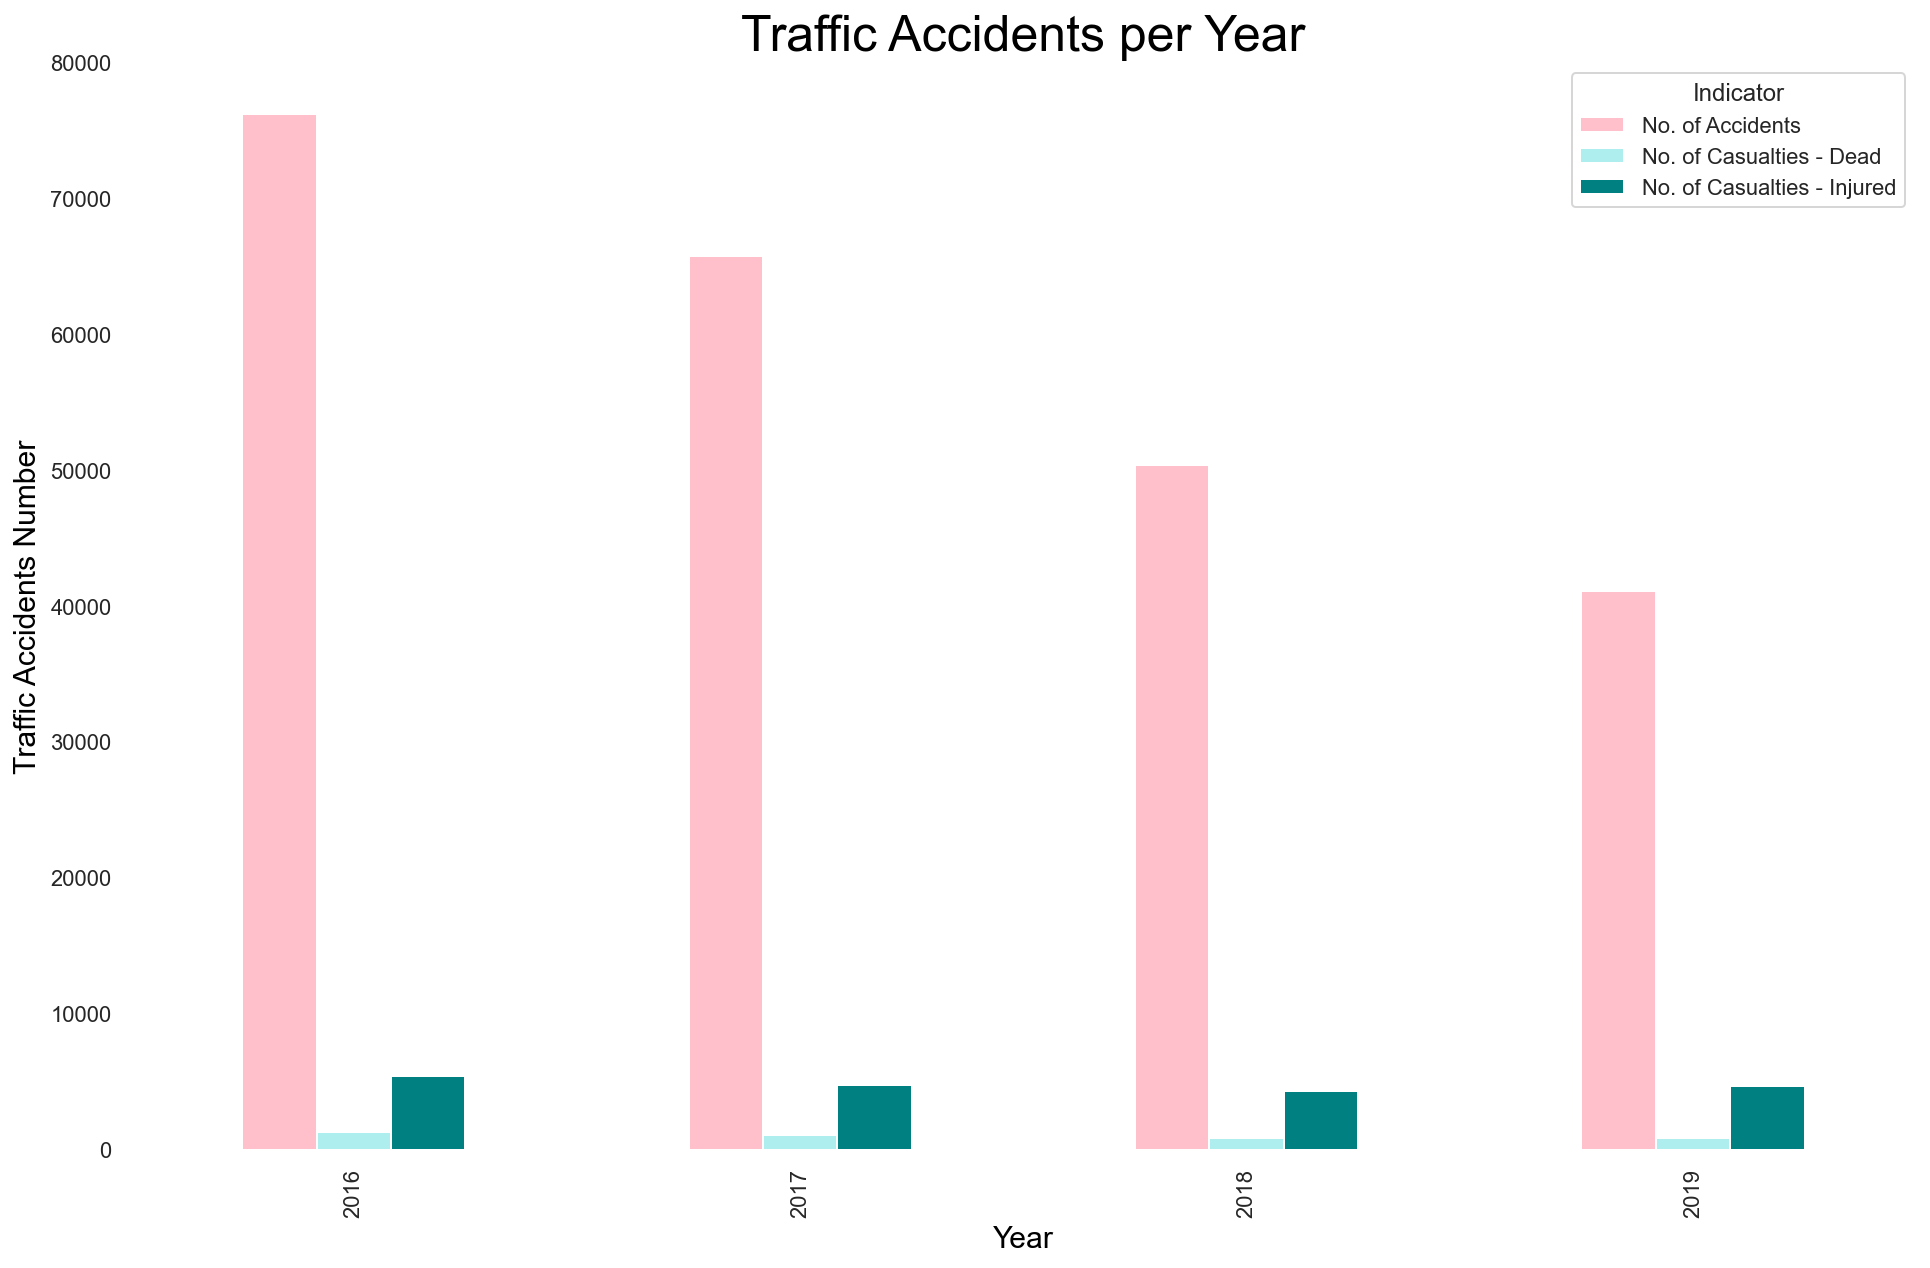

In [86]:
traffic_accidents_p.groupby('Year').mean().plot(kind='bar',figsize=(16,10),color={'teal','pink','paleturquoise'});
plt.xlabel('Year', fontsize = 15,color='black') 
plt.ylabel('Traffic Accidents Number', fontsize = 15,color='black')
plt.title('Traffic Accidents per Year', fontsize = 25,color='black');

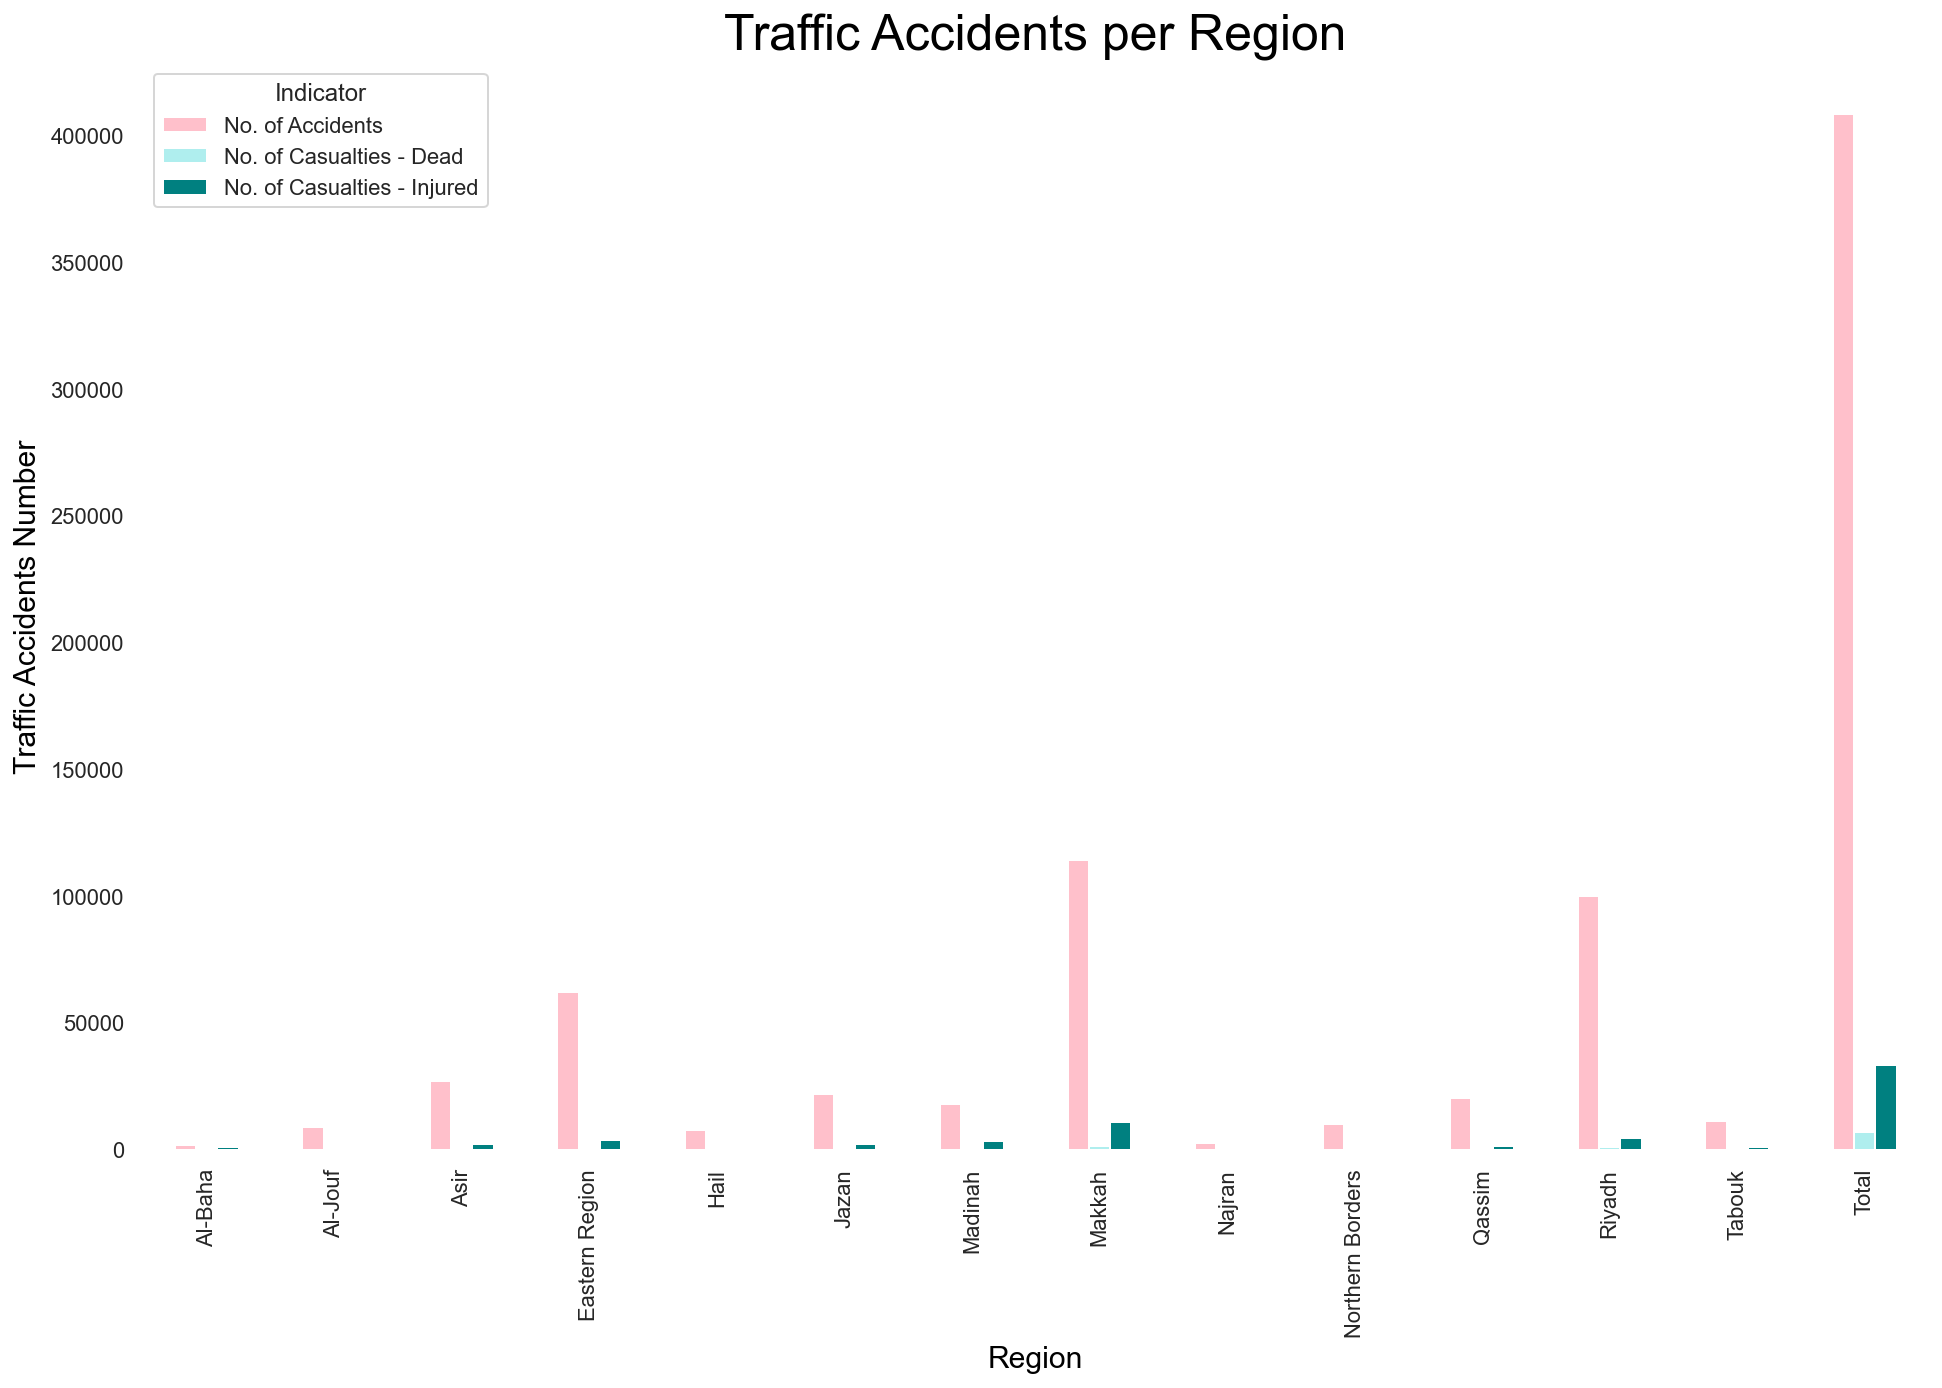

In [87]:
traffic_accidents_p.groupby('Region').mean().plot(kind='bar',figsize=(16,10),color={'teal','pink','paleturquoise'});
plt.xlabel('Region', fontsize = 15,color='black') 
plt.ylabel('Traffic Accidents Number', fontsize = 15,color='black')
plt.title('Traffic Accidents per Region', fontsize = 25,color='black');

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer:
I advise to focus on the Makkah region, but to get a clearer result, we must obtain more information and characteristics such as the age, health and mental state of the driver, and whether the cause of the accident was a human error or for another reason such as the air suit for the weather or a malfunction in the vehicle ... etc.